# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score




# Overview of the dataset

**Load Dataset**


In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = "/content/ExtraaLearn.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the loaded dataset
print(data.head())

       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639               1.86100   
1               2                     83               0.32000   
2               3                    330               0.07400   
3               4                    464               2.05700   
4               4                    600              16.91400   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

# Observations
Age Range: The dataset includes individuals with ages ranging from 23 to 57, representing a diverse age group.

Occupation Distribution: The individuals' current occupations vary and include categories such as 'Unemployed', 'Professional', and 'Student'.

Interaction Platforms: Users have engaged with the platform through different channels, including 'Website' and 'Mobile App'.

Profile Completion: The profile completion status varies, with categories like 'High', 'Medium', and 'Low', indicating the completeness of user profiles.

Engagement Metrics: Metrics such as 'Website Visits', 'Time Spent on Website', and 'Page Views per Visit' vary across individuals, reflecting diverse levels of engagement with the platform.

Last Activity: Users' last activities are recorded, including 'Website Activity' and 'Email Activity', indicating the recent interactions they had with the platform.

Media Preferences: Users' preferences for different media types are captured through columns like 'print_media_type1', 'print_media_type2', and 'digital_media'.

Educational Channels: The dataset includes information about whether users are engaged with educational channels, indicated by 'Yes' or 'No'.

Referral Status: Users' referral status is captured as 'Yes' or 'No', indicating whether they were referred by others.

Target Variable 'Status': The 'status' column likely represents a binary outcome, possibly indicating the success or response of a certain action.

These observations provide a preliminary understanding of the dataset

## Data Overview

- Observations
- Sanity checks

##**View the first and last 5 rows of the dataset**

In [ ]:
data.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639               1.86100   
1               2                     83               0.32000   
2               3                    330               0.07400   
3               4                    464               2.05700   
4               4                    600              16.91400   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

In [ ]:
data.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360               2.17000   
4608               8                   2327               5.39300   
4609               2                    212               2.69200   
4610               1                    154               3.87900   
4611               4                   2290               2.07500   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

##**Understand the shape of the dataset**

In [ ]:
data.shape

(4612, 15)

# Observations:

**There are 4612 rows and 15 columns in the dataset **

##**Checking the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

# **Observations**
This data is with 4612 entries and 15 columns.
The dataset contains information related to various attributes of individuals, including their age, current occupation, interactions with the website, media preferences, and more.

In [ ]:
# Checking for duplicate entries
duplicate_entries = data[data.duplicated()]

# Displaying duplicate entries
print(duplicate_entries)


Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []


Let's drop the ID column first before we proceed forward.

In [ ]:
data = data.drop('ID', axis=1)
data.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639               1.86100  Website Activity   
1                     83               0.32000  Website Activity   
2                    330               0.07400  Website Activity   
3                    464               2.05700  Website Activity   
4                    600              16.91400    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

##**Checking for null values in the data**

In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Display the null counts
print(null_counts)

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


# Observations
 Dataset has no missing values

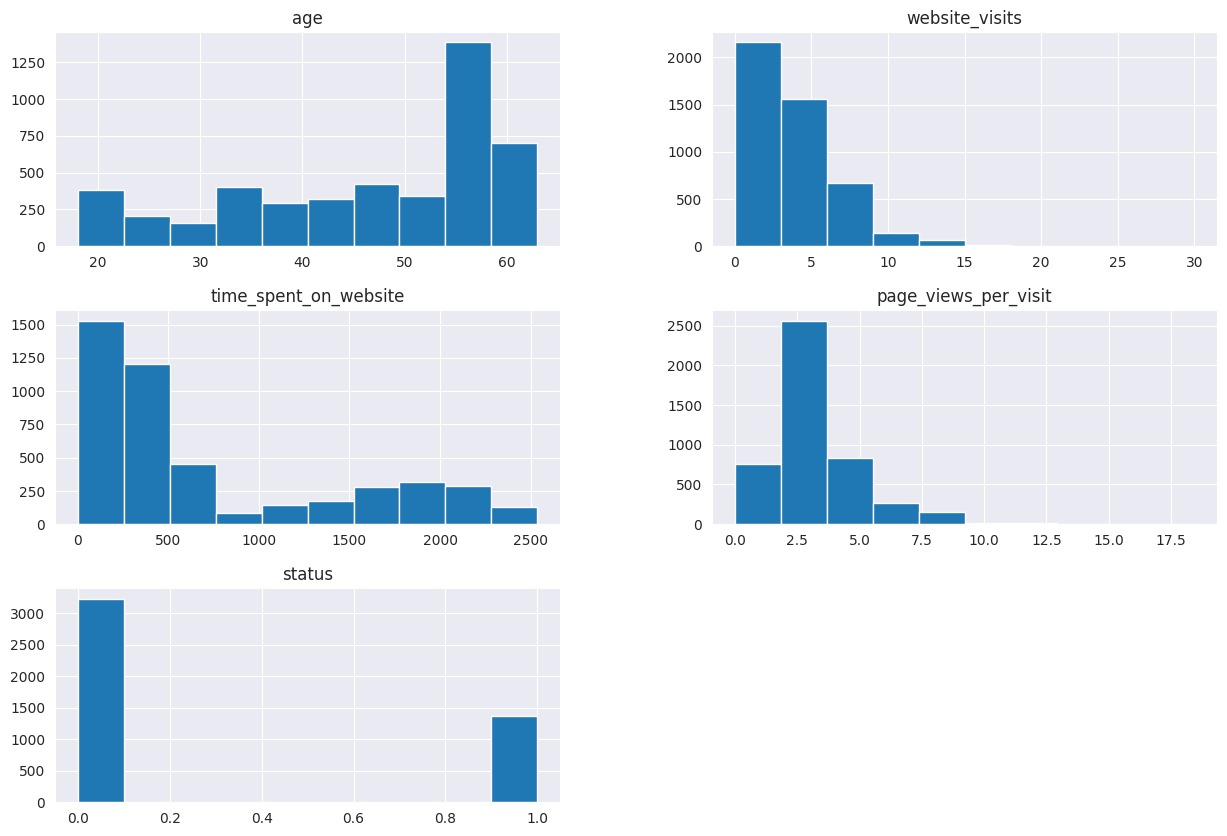

In [ ]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

In [ ]:
# defining columns where we need to replace 0 with NaN
cols = ["website_visits", "time_spent_on_website", "page_views_per_visit"]

In [ ]:
# replacing 0 with NaN
data[cols] = data[cols].replace(0, np.nan)

In [ ]:
# let's check missing values in the data again
data.isna().sum()

age                        0
current_occupation         0
first_interaction          0
profile_completed          0
website_visits           174
time_spent_on_website    174
page_views_per_visit     181
last_activity              0
print_media_type1          0
print_media_type2          0
digital_media              0
educational_channels       0
referral                   0
status                     0
dtype: int64


# Observations
Eventhough data set had no missing values, found some numeric columns with 0 values. Treated them to NaNand the replace with Mean.

In [ ]:
# Let's impute missing values using mean value
data[cols] = data[cols].fillna(data[cols].mean())

In [ ]:
# let's check missing values in the data again
data.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

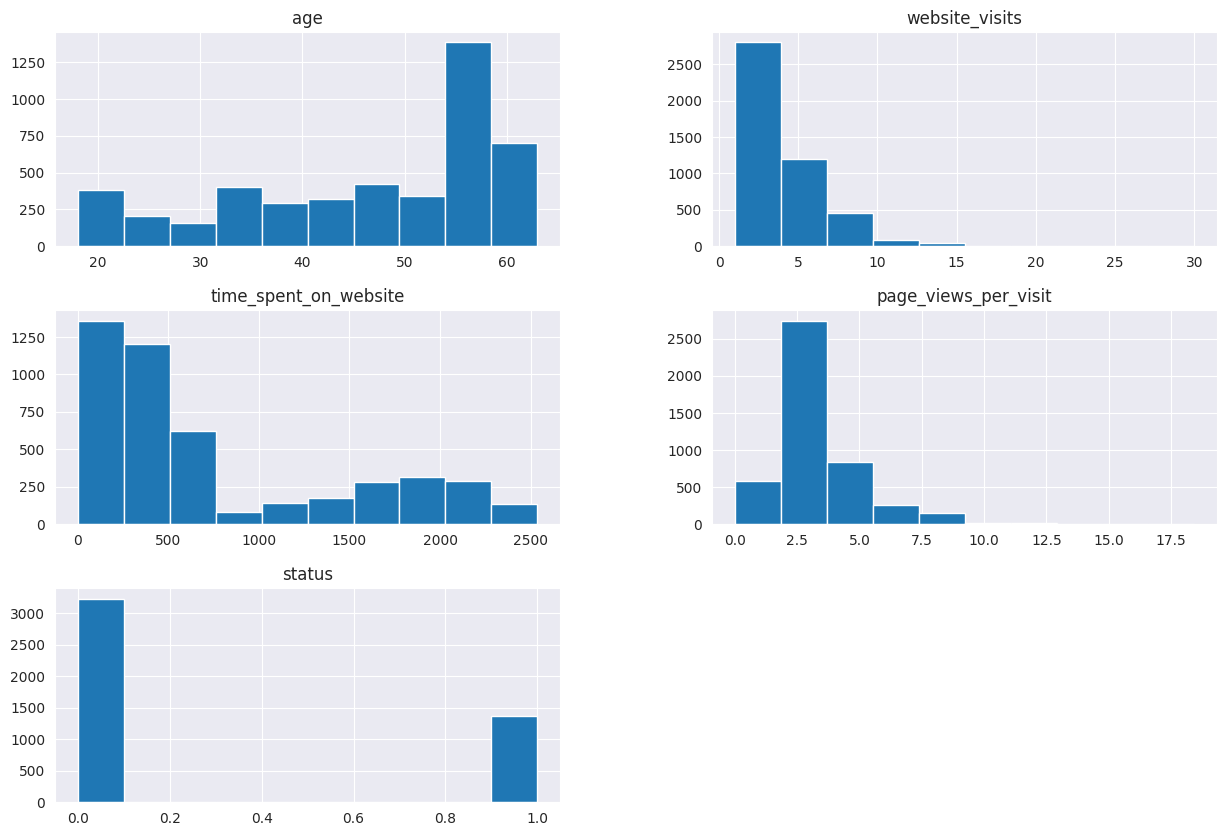

In [ ]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

cols = ["website_visits", "time_spent_on_website", "page_views_per_visit"]

In [ ]:

filtered_data = data[data['website_visits'] == 0]

# Display the selected records
print(filtered_data)

Empty DataFrame
Columns: [age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []


In [ ]:
# Assuming 'data' is your DataFrame
filtered_data = data[data['time_spent_on_website'] == 0]

# Display the selected records
print(filtered_data)

Empty DataFrame
Columns: [age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []


In [ ]:
filtered_data = data[data['page_views_per_visit'] == 0]

# Display the selected records
print(filtered_data)

Empty DataFrame
Columns: [age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []


# Observations
 We have imputed all the data entry errors with the mean values.

It looks like no  missing values in dataset, and the result shows that there are no missing values (all columns have zero missing values).

##**Exploratory Data Analysis**

Getting the statistical summary for the dataset

In [ ]:
data.describe(include= 'all').T

count unique             top  freq      mean  \
age                   4612.00000    NaN             NaN   NaN  46.20121   
current_occupation          4612      3    Professional  2616       NaN   
first_interaction           4612      2         Website  2542       NaN   
profile_completed           4612      3            High  2264       NaN   
website_visits        4612.00000    NaN             NaN   NaN   3.70662   
time_spent_on_website 4612.00000    NaN             NaN   NaN 752.39748   
page_views_per_visit  4612.00000    NaN             NaN   NaN   3.14974   
last_activity               4612      3  Email Activity  2278       NaN   
print_media_type1           4612      2              No  4115       NaN   
print_media_type2           4612      2              No  4379       NaN   
digital_media               4612      2              No  4085       NaN   
educational_channels        4612      2              No  3907       NaN   
referral                    4612      2              No  4519       NaN   
status                4612.00000    NaN             NaN   NaN   0.29857   

                            std      min       25%       50%        75%  \
age                    13.16145 18.00000  36.00000  51.00000   57.00000   
current_occupation          NaN      NaN       NaN       NaN        NaN   
first_interaction           NaN      NaN       NaN       NaN        NaN   
profile_completed           NaN      NaN       NaN       NaN        NaN   
website_visits          2.73954  1.00000   2.00000   3.00000    5.00000   
time_spent_on_website 729.87994  1.00000 205.00000 405.00000 1336.75000   
page_views_per_visit    1.87066  0.00400   2.11800   3.08950    3.75625   
last_activity               NaN      NaN       NaN       NaN        NaN   
print_media_type1           NaN      NaN       NaN       NaN        NaN   
print_media_type2           NaN      NaN       NaN       NaN        NaN   
digital_media               NaN      NaN       NaN       NaN        NaN   
educational_channels        NaN      NaN       NaN       NaN        NaN   
referral                    NaN      NaN       NaN       NaN        NaN   
status                  0.45768  0.00000   0.00000   0.00000    1.00000   

                             max  
age                     63.00000  
current_occupation           NaN  
first_interaction            NaN  
profile_completed            NaN  
website_visits          30.00000  
time_spent_on_website 2537.00000  
page_views_per_visit    18.43400  
last_activity                NaN  
print_media_type1            NaN  
print_media_type2            NaN  
digital_media                NaN  
educational_channels         NaN  
referral                     NaN  
status                   1.00000

# Observations


**Age Distribution:** The age of individuals in the dataset varies from 18 to 63 years, with an average age of around 46 years. The age distribution seems to be relatively diverse.


**Occupation Diversity:** The "current_occupation" column indicates that the dataset comprises various types of occupations, with the most common occupation being "Professional."

**First Interaction:** The majority of individuals' first interactions occurred through the website, followed by mobile app interactions.

**Profile Completion:** A significant number of individuals have completed their profiles with a "High" profile completion status.

**Website Engagement:** The average number of website visits is approximately 3.71, with some individuals having visited the website up to 30 times. The average time spent on the website is around 752.40 seconds, indicating a moderate level of engagement.

**Page Views:** On average, individuals view around 3.15 pages per visit. However, there is a notable variation in the number of pages viewed, ranging from very low to as high as 18.43 pages per visit.

**Last Activity:** The last recorded activities include "Email Activity" and "Website Activity," with "Email Activity" being the most common.

**Media Engagement:** The majority of individuals have not engaged with print media or digital media, as indicated by the prevalence of "No" values in the "print_media_type1," "print_media_type2," and "digital_media" columns.

**Educational Channels:** Most individuals have not engaged with educational channels, as indicated by the prevalence of "No" values in the "educational_channels" column.

**Referral and Status:** A large proportion of individuals have not been referred by anyone ("No" values in the "referral" column). The "status" column indicates that around 30% of individuals have a status value of 1, which might be indicative of a certain outcome or behavior.




**Exploratory Data Analysis**

 First exploreing the numerical variables.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
numerical_summary = data.describe()
print(numerical_summary)

             age  website_visits  time_spent_on_website  page_views_per_visit  \
count 4612.00000      4612.00000             4612.00000            4612.00000   
mean    46.20121         3.70662              752.39748               3.14974   
std     13.16145         2.73954              729.87994               1.87066   
min     18.00000         1.00000                1.00000               0.00400   
25%     36.00000         2.00000              205.00000               2.11800   
50%     51.00000         3.00000              405.00000               3.08950   
75%     57.00000         5.00000             1336.75000               3.75625   
max     63.00000        30.00000             2537.00000              18.43400   

          status  
count 4612.00000  
mean     0.29857  
std      0.45768  
min      0.00000  
25%      0.00000  
50%      0.00000  
75%      1.00000  
max      1.00000  


**Observations**

**Age Distribution:** The age distribution of individuals in the dataset ranges from 18 to 63 years. The majority of individuals fall within the age range of 36 to 57 years, with a mean age of approximately 46.20 years.

**Website Engagement:** Individuals have visited the website varying numbers of times. The average number of website visits is around 3.71, with some individuals visiting up to 30 times. This suggests a diverse level of engagement with the website.

**Time Spent on Website:** The time individuals spent on the website varies widely, with an average of approximately 752.40 seconds (12.54 minutes). This indicates varying degrees of interaction and engagement with the website's content.

**Page Views per Visit:** On average, individuals view about 3.15 pages per visit, with a maximum of 18.43 pages viewed per visit. This metric indicates the extent to which individuals explore different sections of the website during their visits.

Status Indicator: The "status" attribute indicates whether an individual has a certain status (1) or not (0). About 30% of individuals have this status, suggesting that it might be a relatively uncommon characteristic.


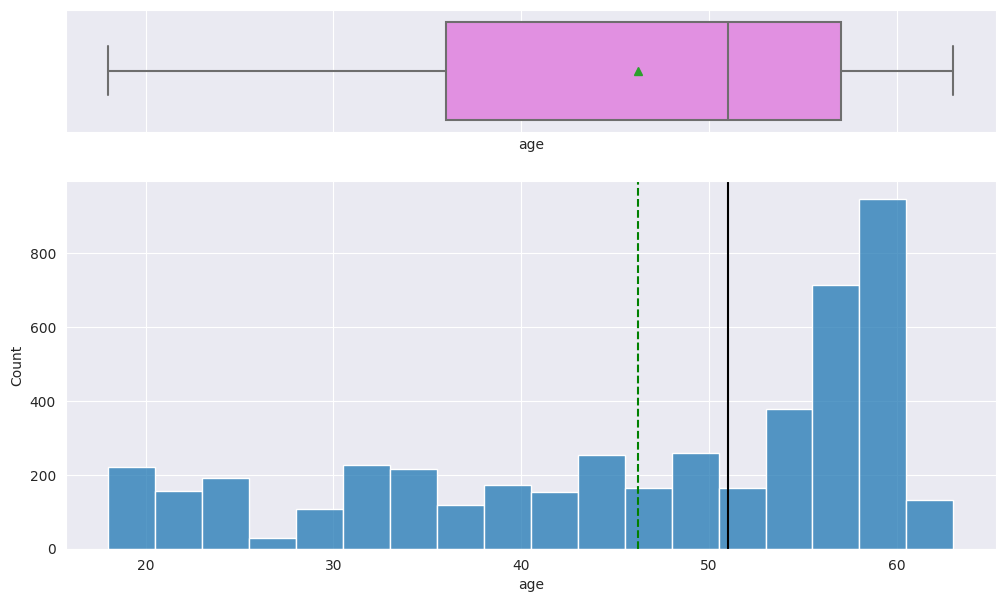

In [ ]:
histogram_boxplot(data, "age")

# Observations:

Age: The age of the leads in the dataset ranges from 18 to 63, with an average age of around 46. The distribution appears to be relatively spread out, with a standard deviation of about 13. This suggests that the leads' ages vary significantly.

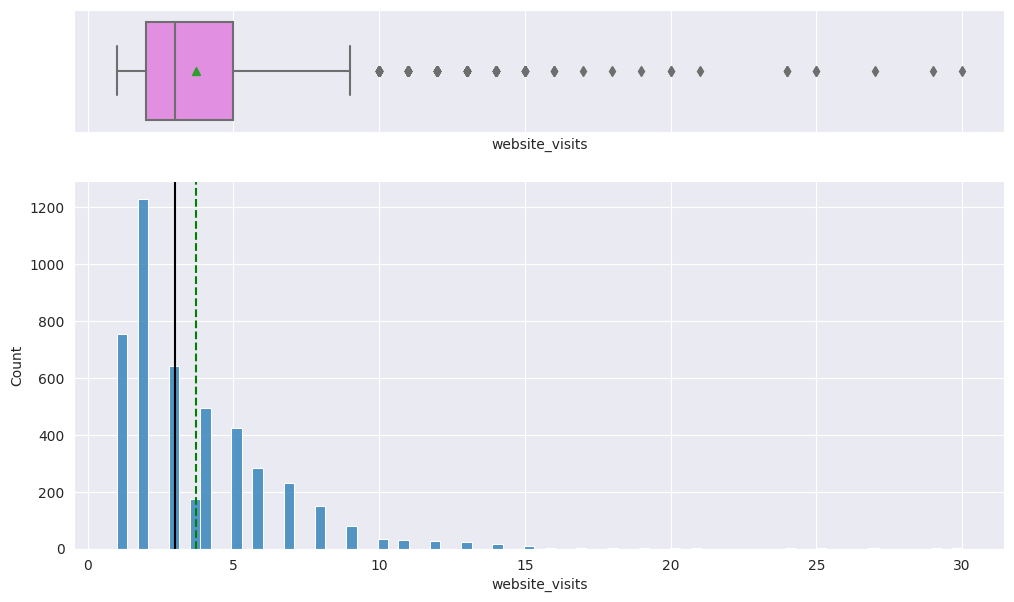

In [ ]:
histogram_boxplot(data,"website_visits")

# Observations:
 Website Visits: The average number of website visits per lead is around 3.57, with a maximum of 30 visits. The standard deviation of 2.83 indicates some variability in the number of visits, with some leads having visited the website more frequently than others.

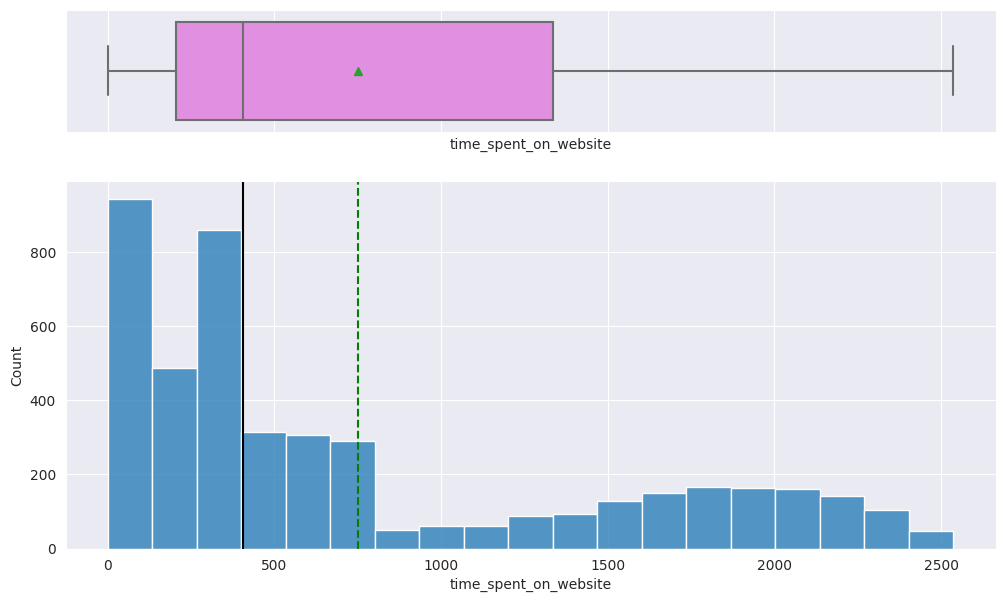

In [ ]:
histogram_boxplot(data,"time_spent_on_website")

**Observations:**


 Time Spent on Website: The average time spent on the website is approximately 724 seconds, but this varies widely, as indicated by the high standard deviation of 743.83. This suggests that some leads spend significantly more time on the website than others.

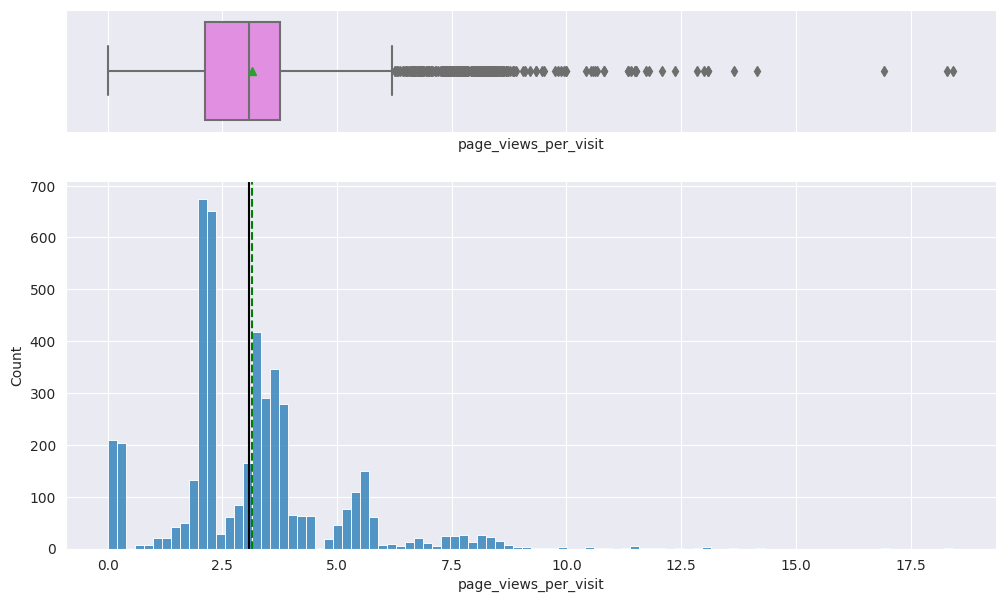

In [ ]:
histogram_boxplot(data,"page_views_per_visit")

**Observations:**

  Page Views per Visit: On average, leads view around 3 pages per visit to the website. The distribution appears to have moderate variability, with a standard deviation of 1.97. Some leads might engage more deeply with the content, viewing more pages per visit.

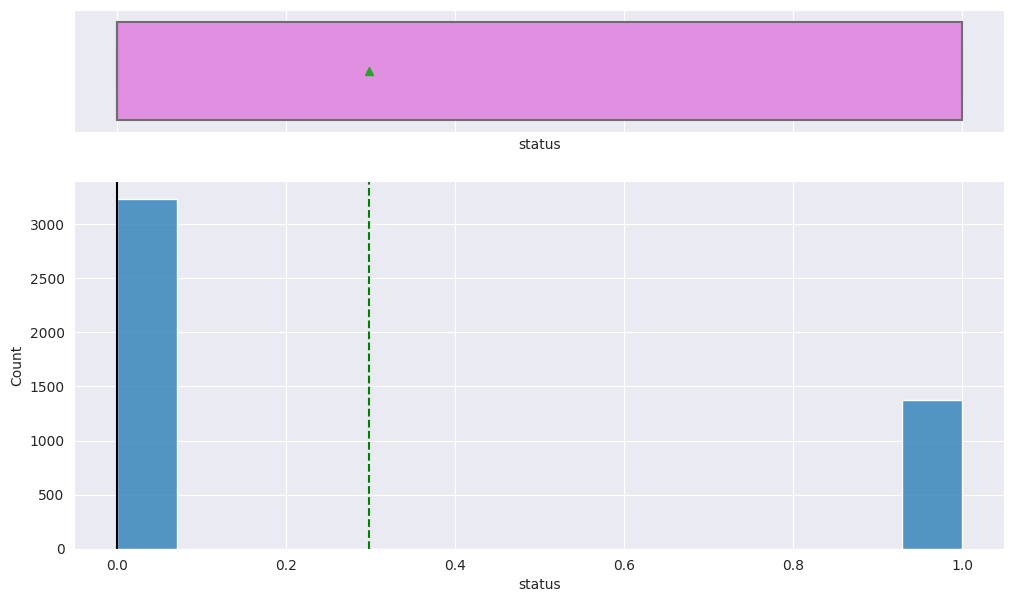

In [ ]:
histogram_boxplot(data,"status")

# Observations:

 Status: The "status" variable indicates whether a lead was converted to a paid customer (1) or not (0). The mean value of 0.30 suggests that approximately 30% of leads were converted. The standard deviation of 0.46 indicates a reasonable spread between converted and non-converted leads.

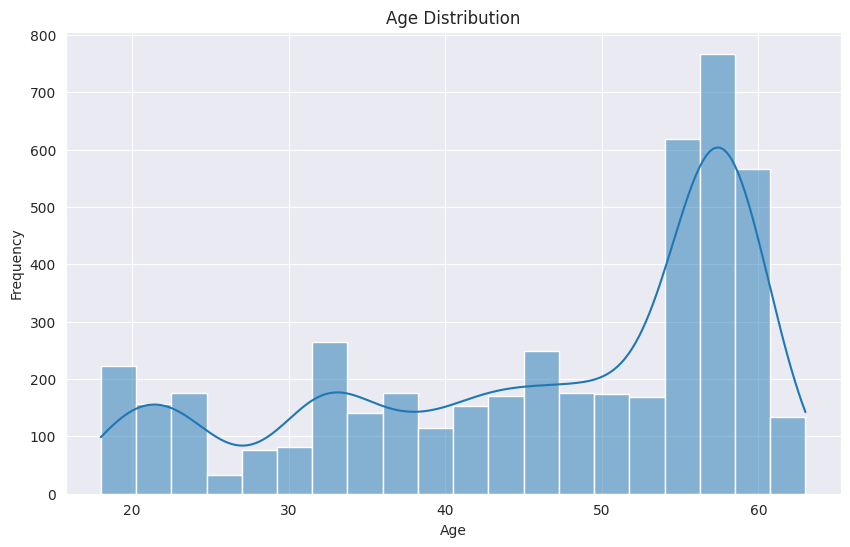

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

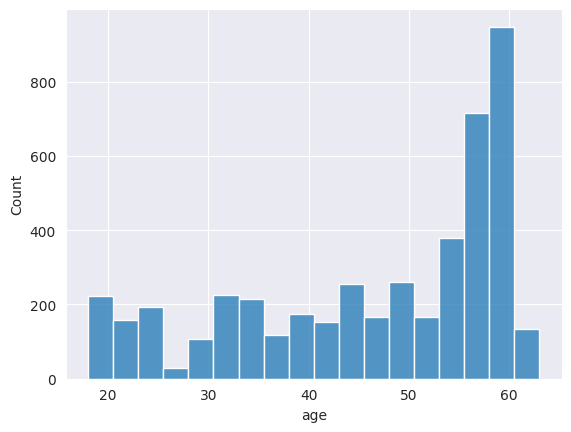

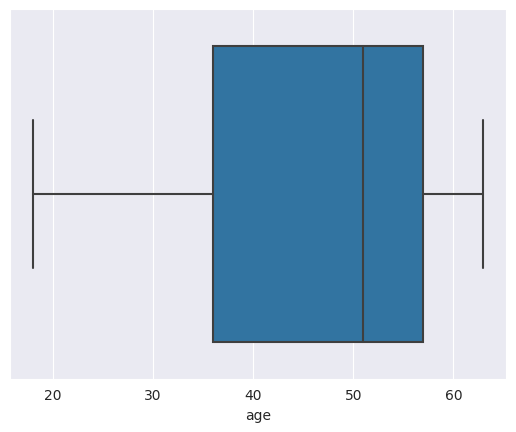

In [ ]:
sns.histplot(data=data,x='age')
plt.show()
sns.boxplot(data=data,x='age')
plt.show()

Observation: Age distribution is between ~ 13 and 65 years.

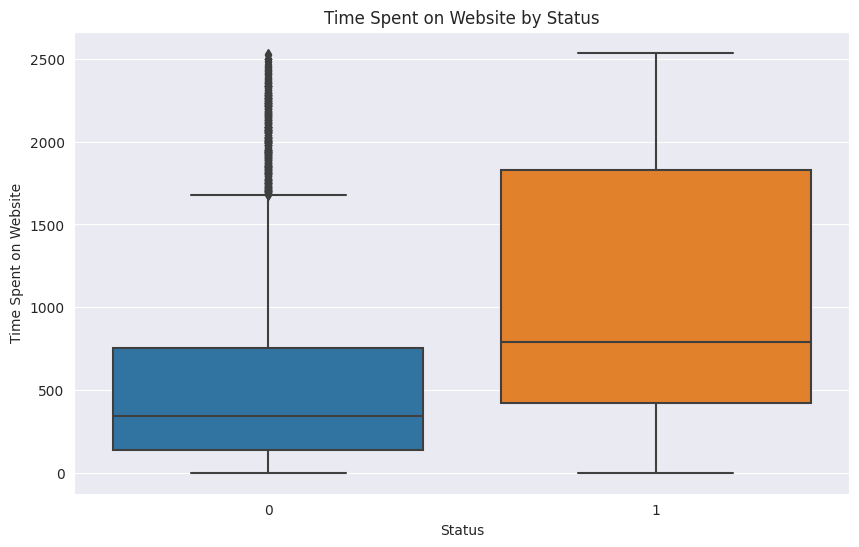

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='time_spent_on_website', data=data)
plt.title("Time Spent on Website by Status")
plt.xlabel("Status")
plt.ylabel("Time Spent on Website")
plt.show()

# Observations:

 time_spent_on_website:

The average time spent on the website is approximately 724 seconds (about 12 minutes).
The time spent on the website ranges from 0 seconds to 2537 seconds.


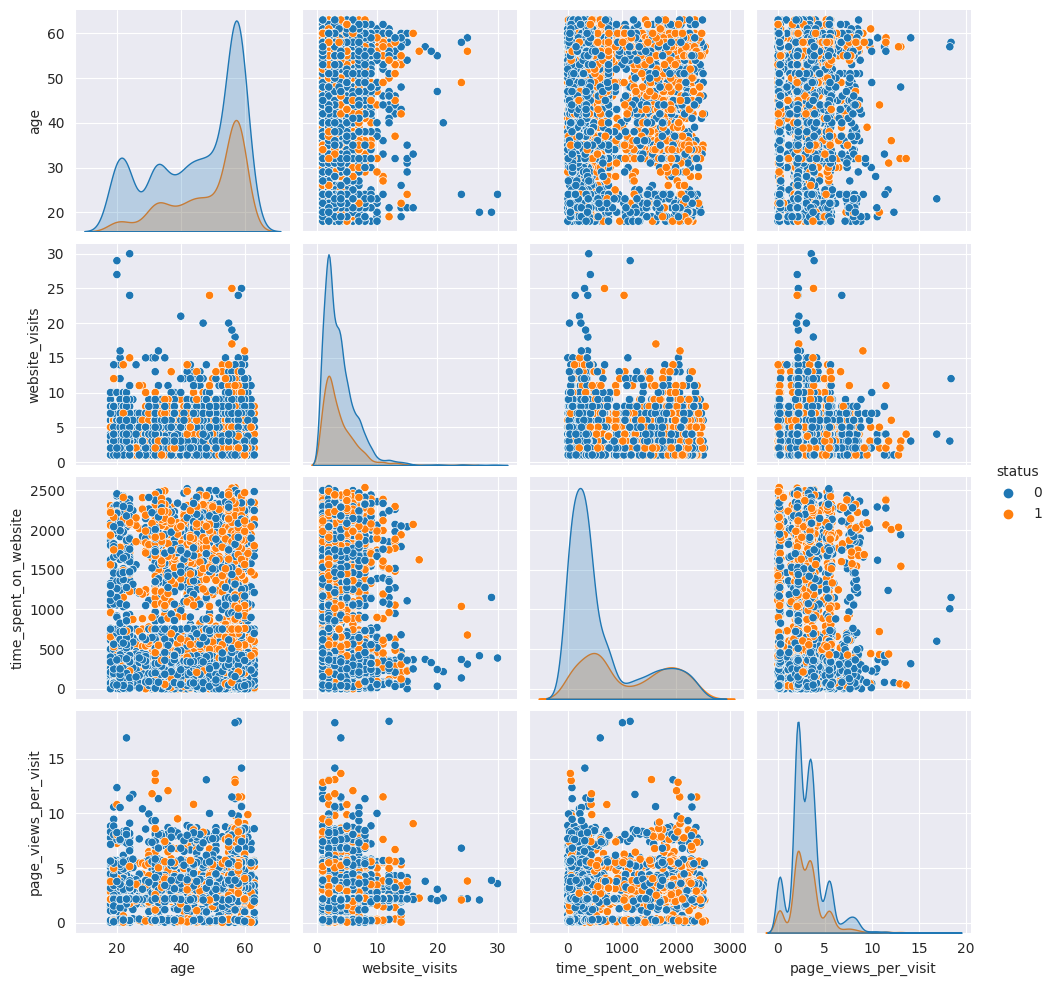

In [ ]:
sns.pairplot(data, hue='status')
plt.show()

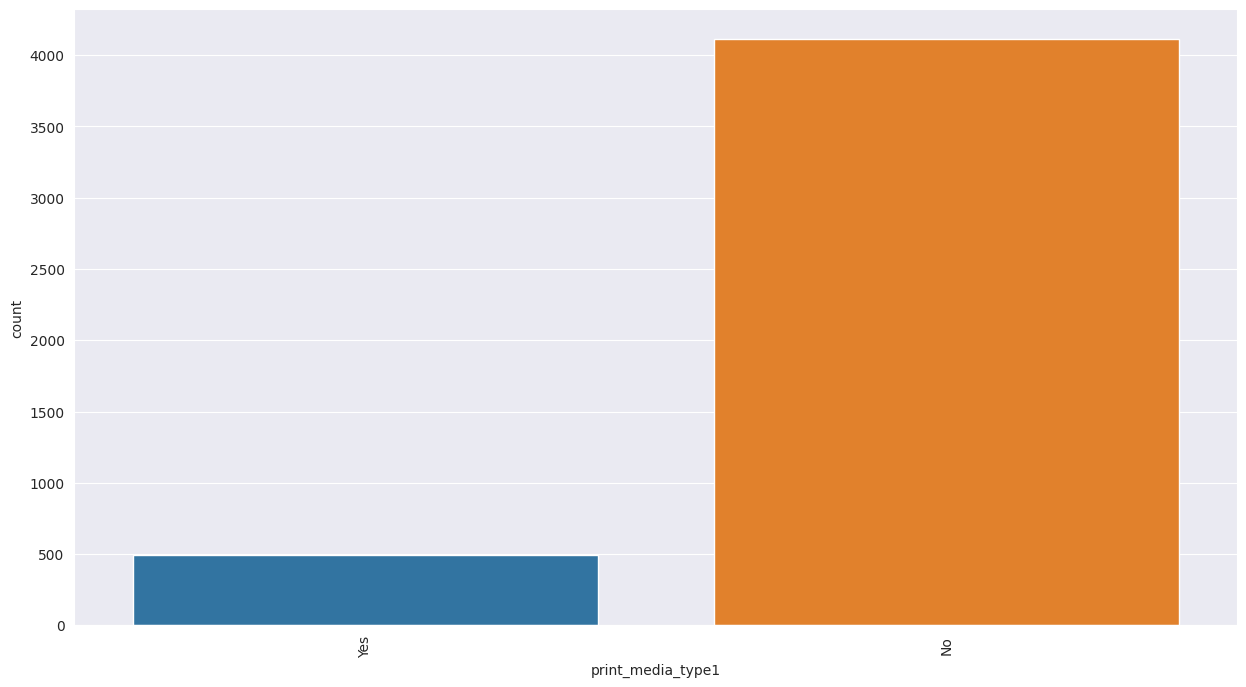

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='print_media_type1')
plt.xticks(rotation=90);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

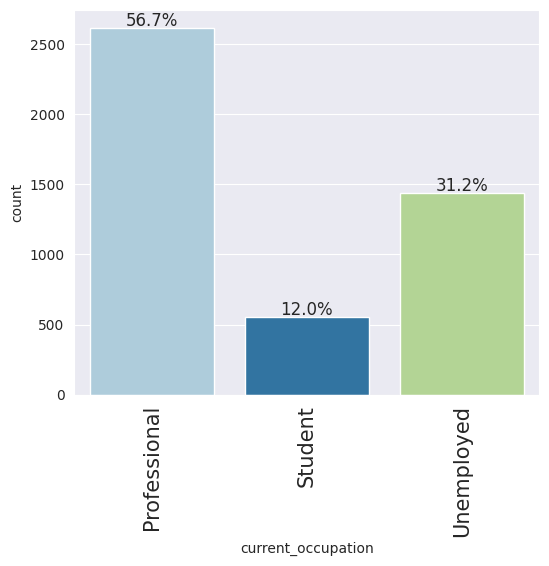

In [ ]:
labeled_barplot(data, feature='current_occupation', perc=True, n=5)

# Observations:


 In this barplot, we can quickly identify the proportion of individuals in each occupation category. Its easiar to compare the percentages of 'Professional', 'Unemployed', and 'Student' categories within the dataset. Professionals are 65% where as students are lowest applicants at 12%.


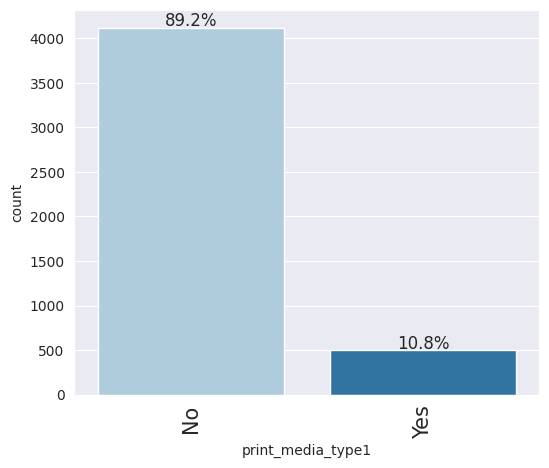

In [ ]:
labeled_barplot(data, feature='print_media_type1', perc=True, n=5)

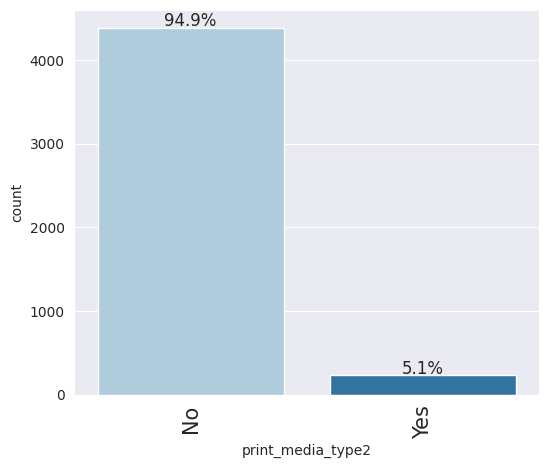

In [ ]:
labeled_barplot(data, feature='print_media_type2', perc=True, n=5)

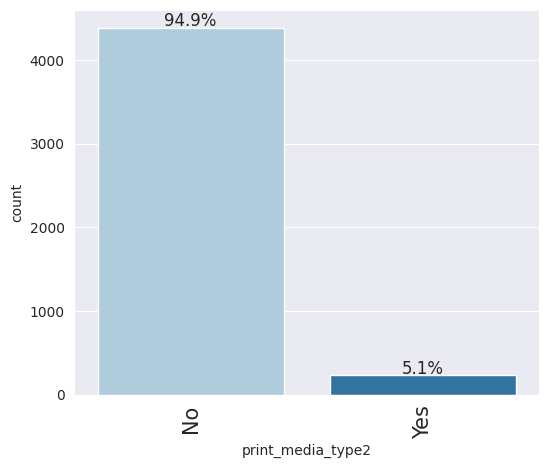

In [ ]:
labeled_barplot(data, feature='print_media_type2', perc=True, n=5)

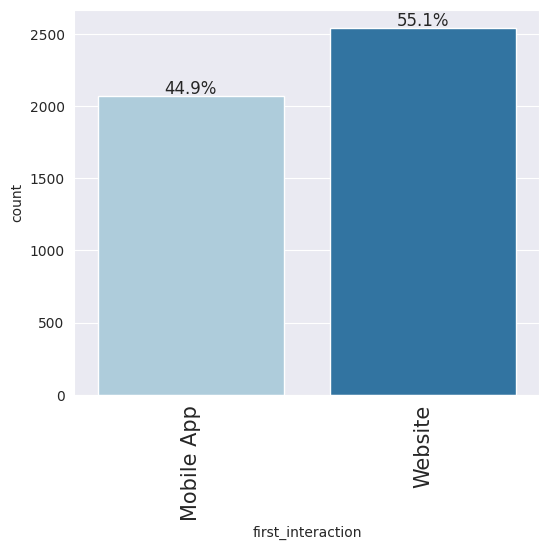

In [ ]:
labeled_barplot(data, feature='first_interaction', perc=True, n=5)

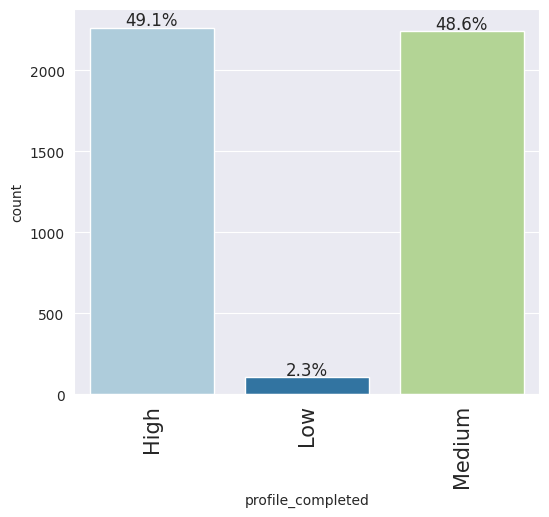

In [ ]:
labeled_barplot(data, feature='profile_completed', perc=True, n=5)

# Observations:

**profile_completed:**
Interpretation: Most leads have a 'High' completion level for their profiles, indicating that a significant number of leads have filled out a substantial portion of their profiles.


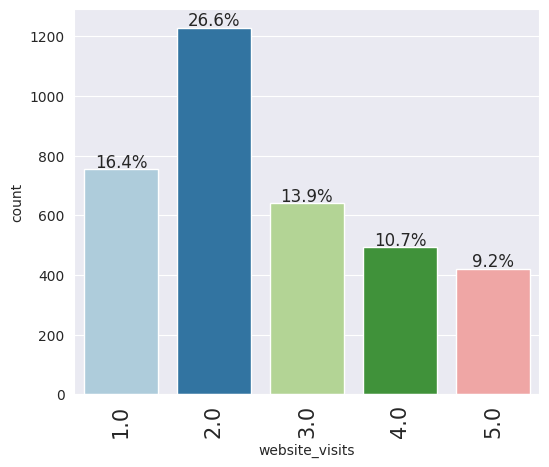

In [ ]:
labeled_barplot(data, feature='website_visits', perc=True, n=5)


# Observations:
**website_visits:**

•	Average: Approximately 3.57 visits per lead

•	Interpretation: Most leads have visited the website multiple times, with an average of around 3.57 visits. Some leads visited the website up to 30 times.


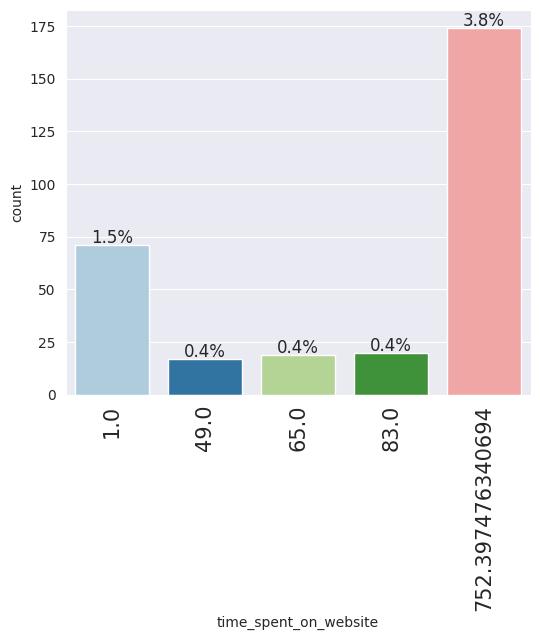

In [ ]:
labeled_barplot(data, feature='time_spent_on_website', perc=True, n=5)

# Observations:
**time_spent_on_website:**
•	Numerical Data: Ranges from 0

•	Average: Approximately 724.01 seconds (12 minutes) spent on the website

•	Interpretation: On average, leads spent about 12 minutes on the website. Some leads spent as little as 0 seconds, while others spent over 42 minutes (2537 seconds).


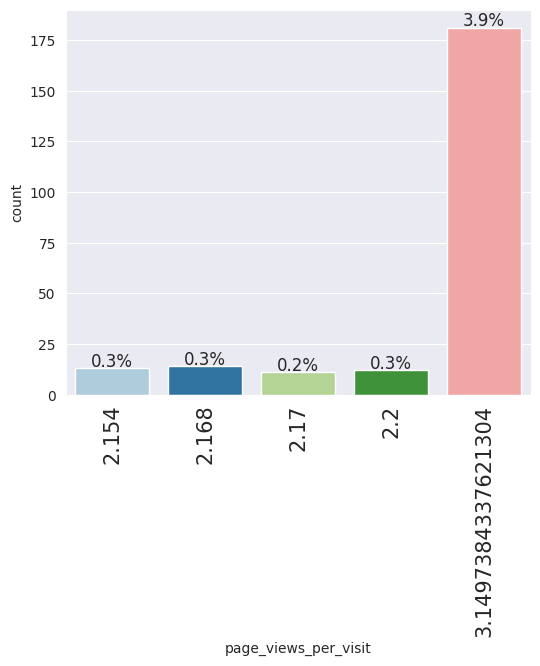

In [ ]:
labeled_barplot(data, feature='page_views_per_visit', perc=True, n=5)

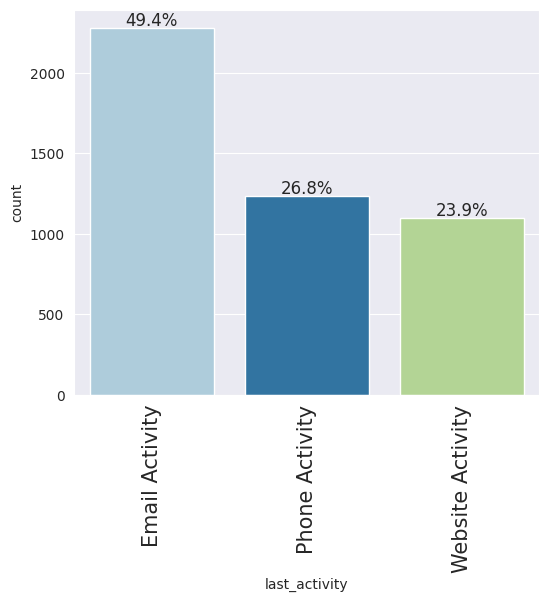

In [ ]:
labeled_barplot(data, feature='last_activity', perc=True, n=5)

# Observations:

**last_activity:**

•	Categories: 'Email Activity', 'Phone Activity', 'Website Activity'

•	Highest Frequency: 'Email Activity' (2278 occurrences)

•	Interpretation: Most recent interactions were through 'Email Activity', indicating that email communication is a common method for lead engagement.


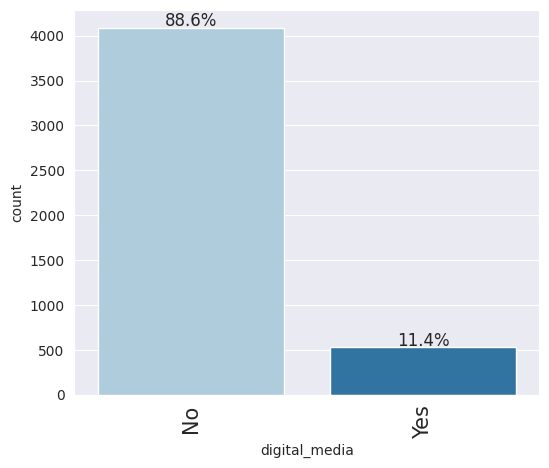

In [ ]:
labeled_barplot(data, feature='digital_media', perc=True, n=5)


# Observations:

**•	Categories**: 'Yes', 'No'

**•	Highest Frequency:** 'No'



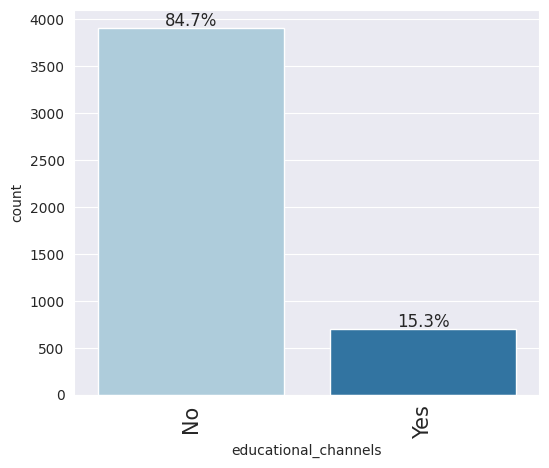

In [ ]:
labeled_barplot(data, feature='educational_channels', perc=True, n=5)

# Observations:
**•	Categories:** 'Yes', 'No'

**•	Highest Frequency:** 'No'



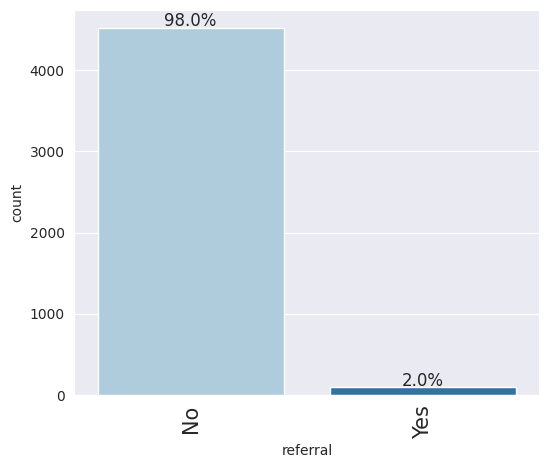

In [ ]:
labeled_barplot(data, feature='referral', perc=True, n=5)

# Observations:

**•	Categories:** 'Yes', 'No'

**•	Highest Frequency:** 'No'

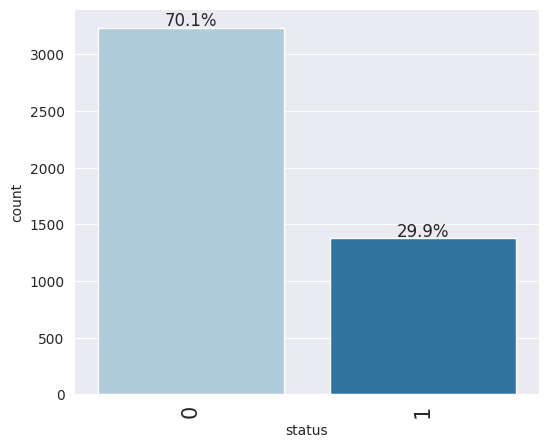

In [ ]:
labeled_barplot(data, feature='status', perc=True, n=5)


## Observations:

**status:**
•	Target Variable

**•	Binary Categories:** Converted (1), Not Converted (0)


**Bivariate Analysis**

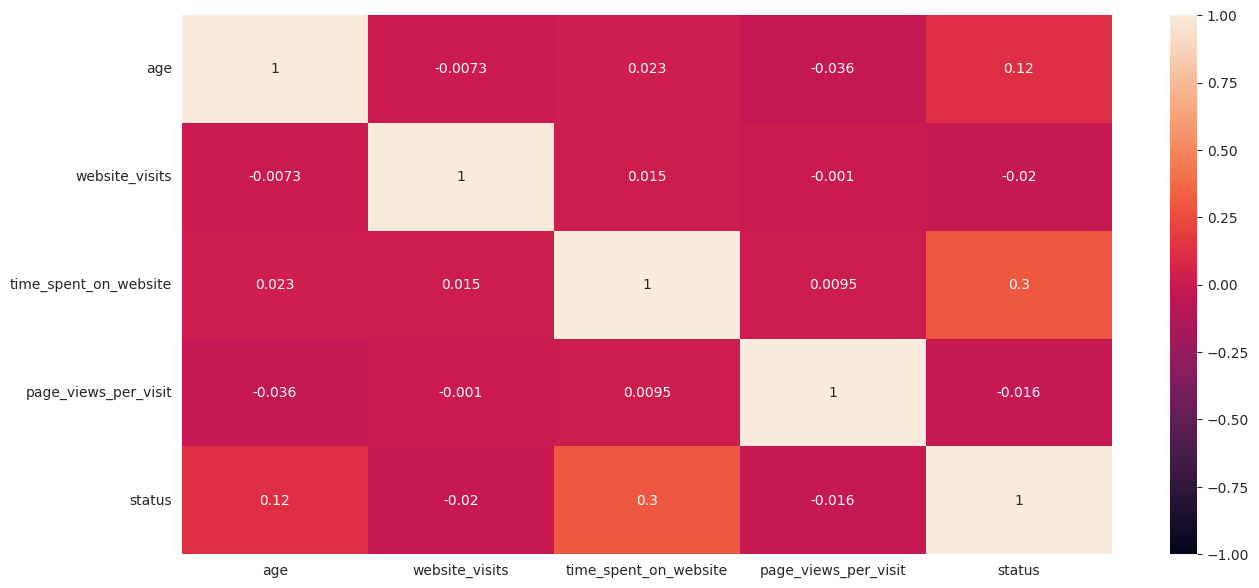

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

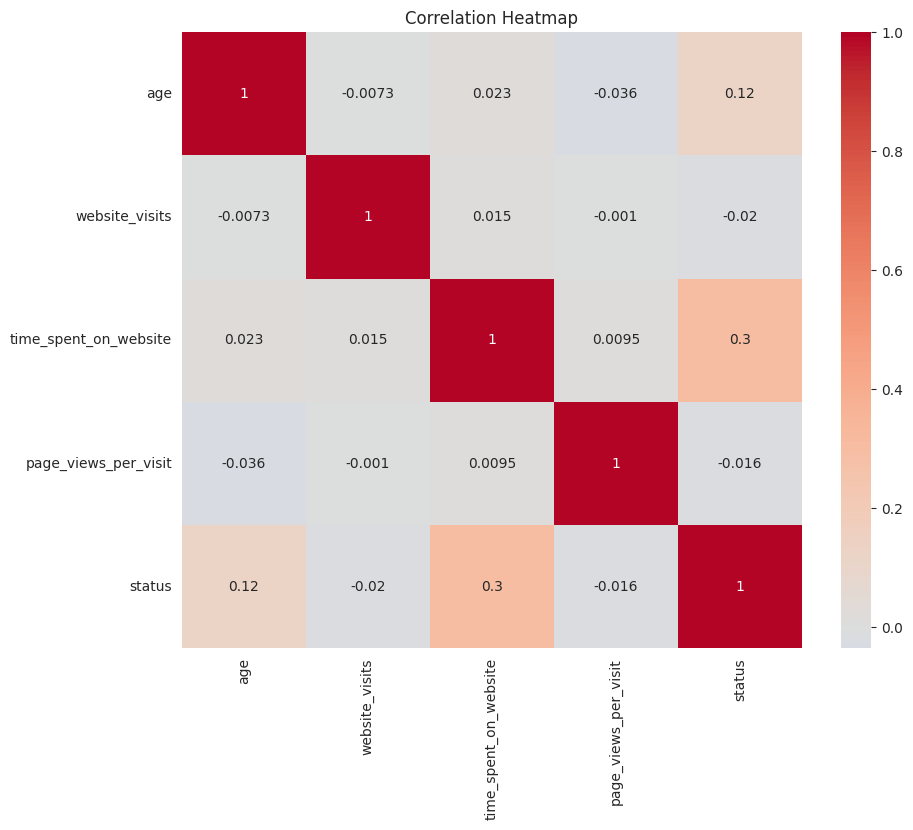

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

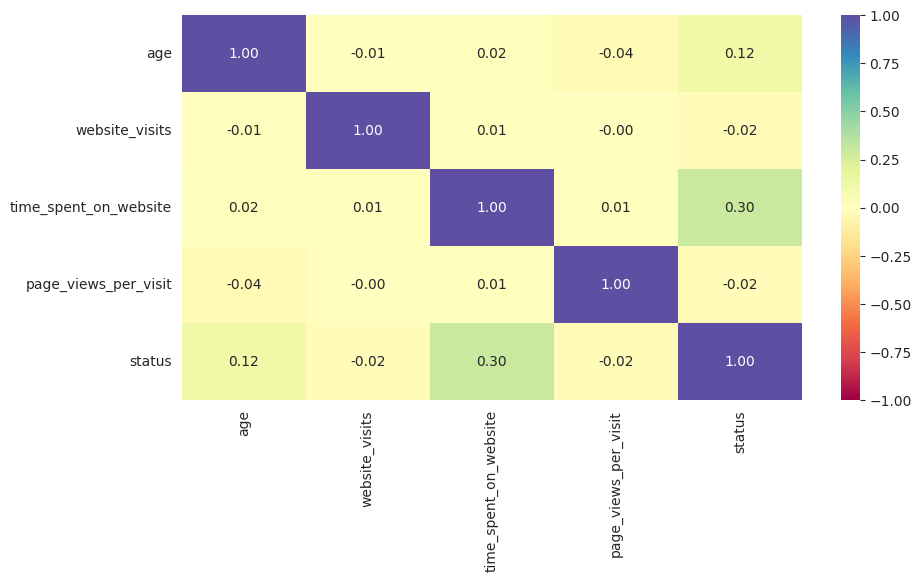

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

# Observations:

No significant case of high correlation among variables observed

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


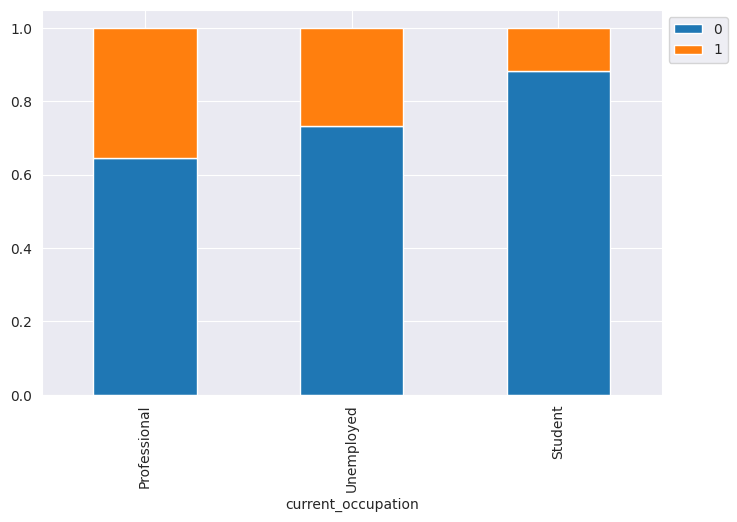

In [ ]:
# Stacked bar plot for current_occupation and status
stacked_barplot(data, predictor='current_occupation', target='status')

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


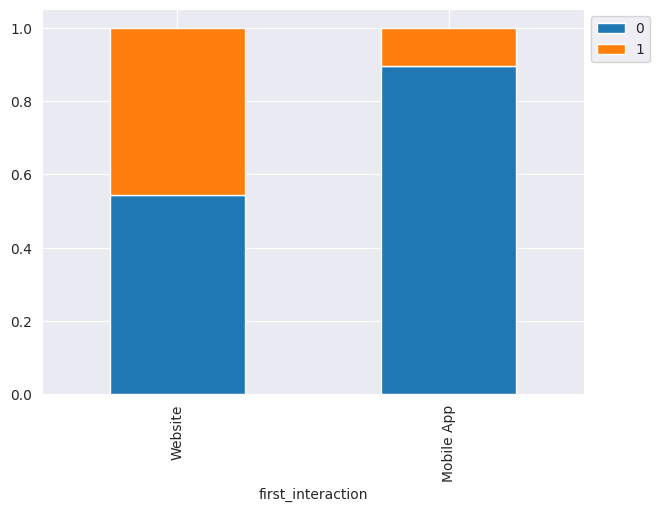

In [ ]:
# Stacked bar plot for first_interaction and status
stacked_barplot(data, predictor='first_interaction', target='status')

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


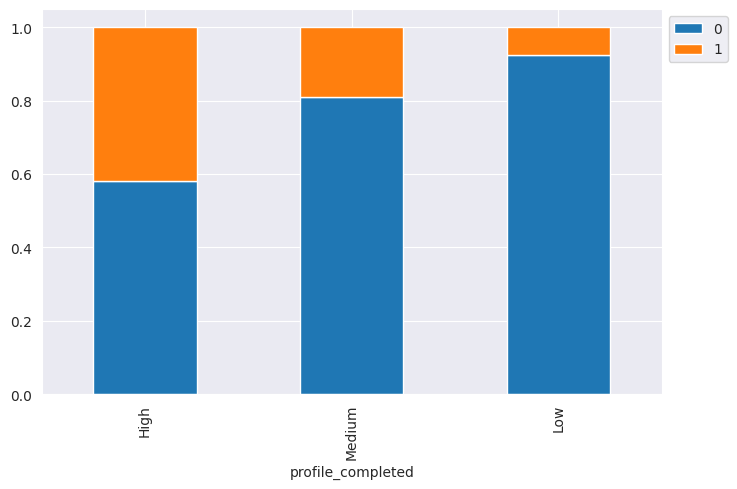

In [ ]:
# Stacked bar plot for profile_completed and status
stacked_barplot(data, predictor='profile_completed', target='status')

status     0     1   All
age                     
All     3235  1377  4612
57       249   136   385
59       207   121   328
58       262   120   382
56       210   120   330
60       162    76   238
55       128    72   200
32       133    55   188
53        51    40    91
50        48    37    85
45        51    33    84
34        43    31    74
46        56    29    85
41        44    26    70
47        55    25    80
44        56    25    81
49        62    25    87
42        59    24    83
43        65    24    89
48        66    22    88
52        55    22    77
36        37    21    58
37        39    21    60
54        67    21    88
35        46    20    66
39        33    19    52
51        69    19    88
40        47    16    63
30        30    14    44
31        25    13    38
38        45    13    58
29        24    12    36
20        63    12    75
24        79    11    90
63        36    11    47
62        37    11    48
18        55    11    66
33        66    10    76


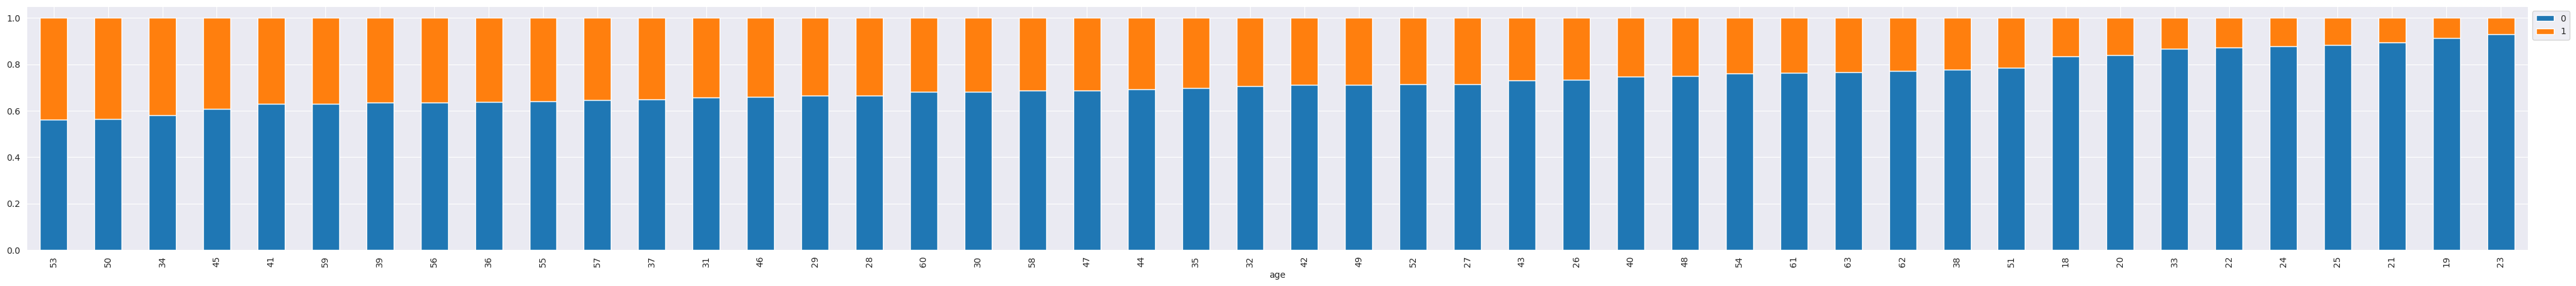

In [ ]:
# Stacked bar plot for profile_completed and status
stacked_barplot(data, predictor='age', target='status')

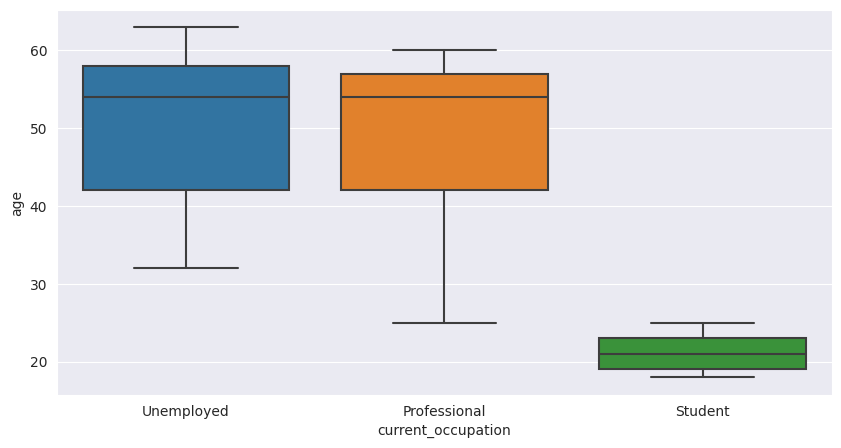

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="current_occupation", y="age")
plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

count     mean     std      min      25%      50%  \
current_occupation                                                          
Professional       2616.00000 49.34748 9.89074 25.00000 42.00000 54.00000   
Student             555.00000 21.14414 2.00111 18.00000 19.00000 21.00000   
Unemployed         1441.00000 50.14018 9.99950 32.00000 42.00000 54.00000   

                        75%      max  
current_occupation                    
Professional       57.00000 60.00000  
Student            23.00000 25.00000  
Unemployed         58.00000 63.00000

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


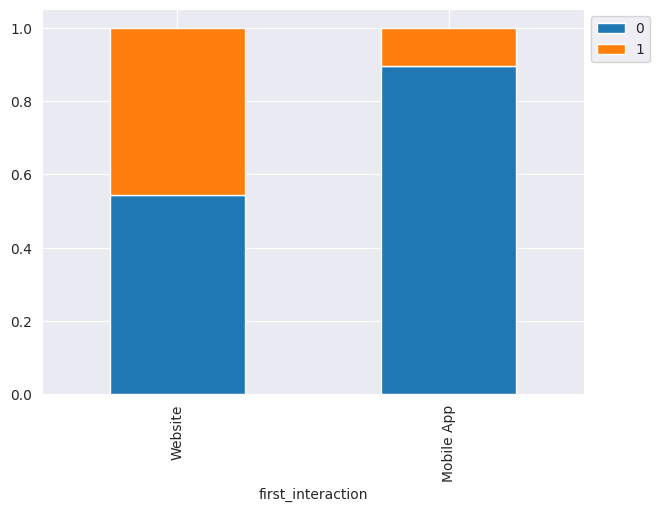

In [ ]:
stacked_barplot(data, predictor="first_interaction", target="status")

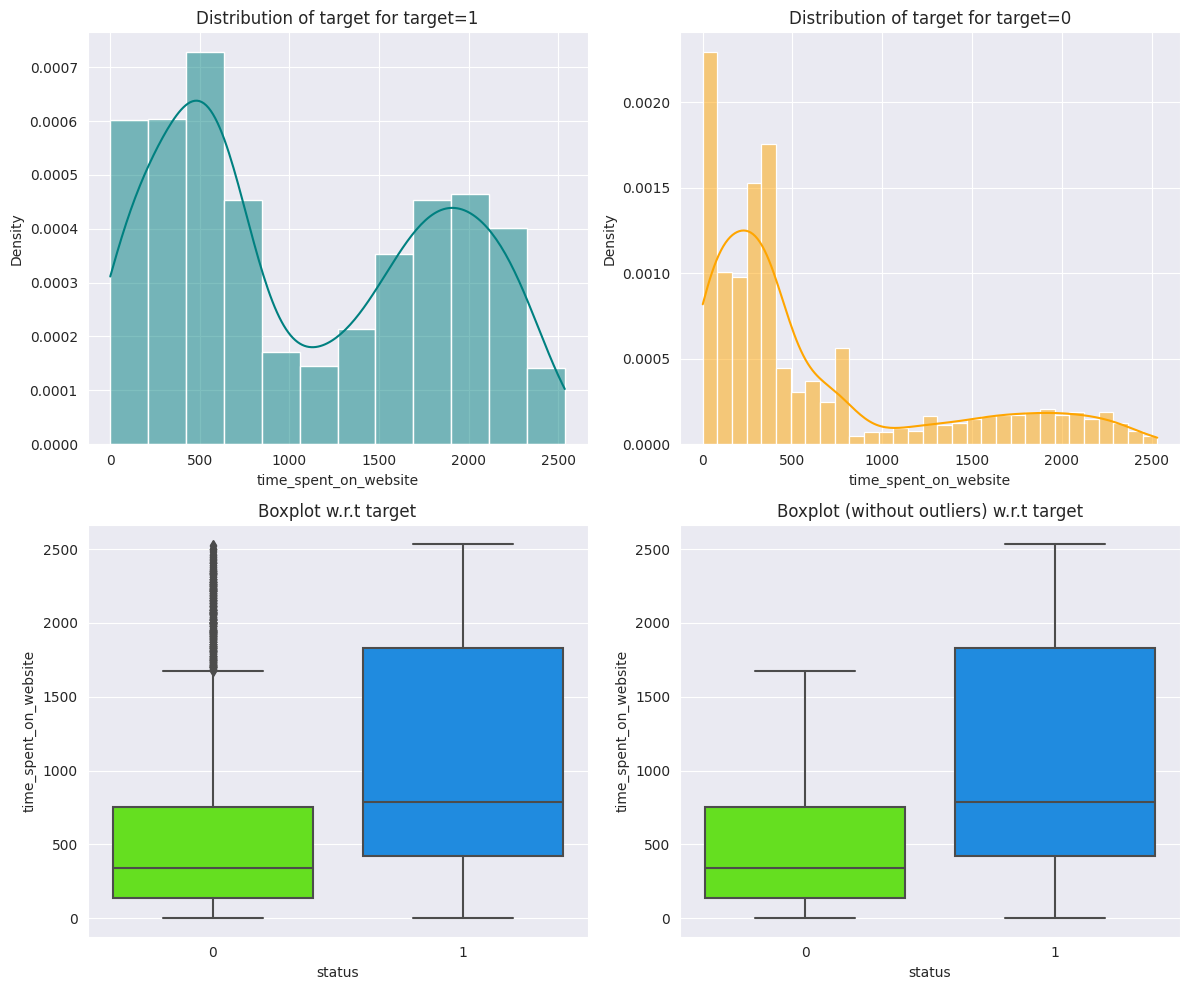

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   342.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

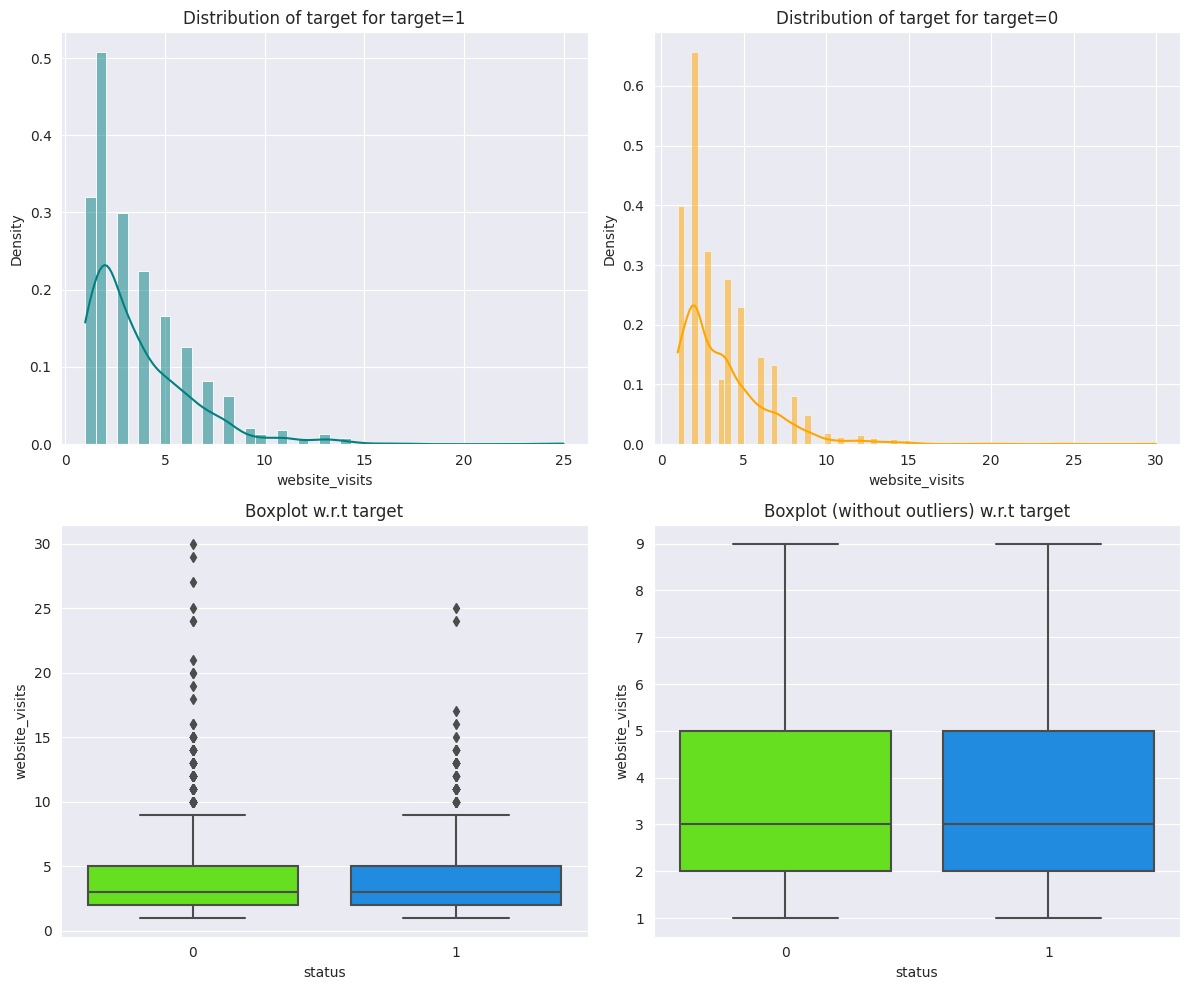

In [ ]:
distribution_plot_wrt_target(data,"website_visits", target="status")

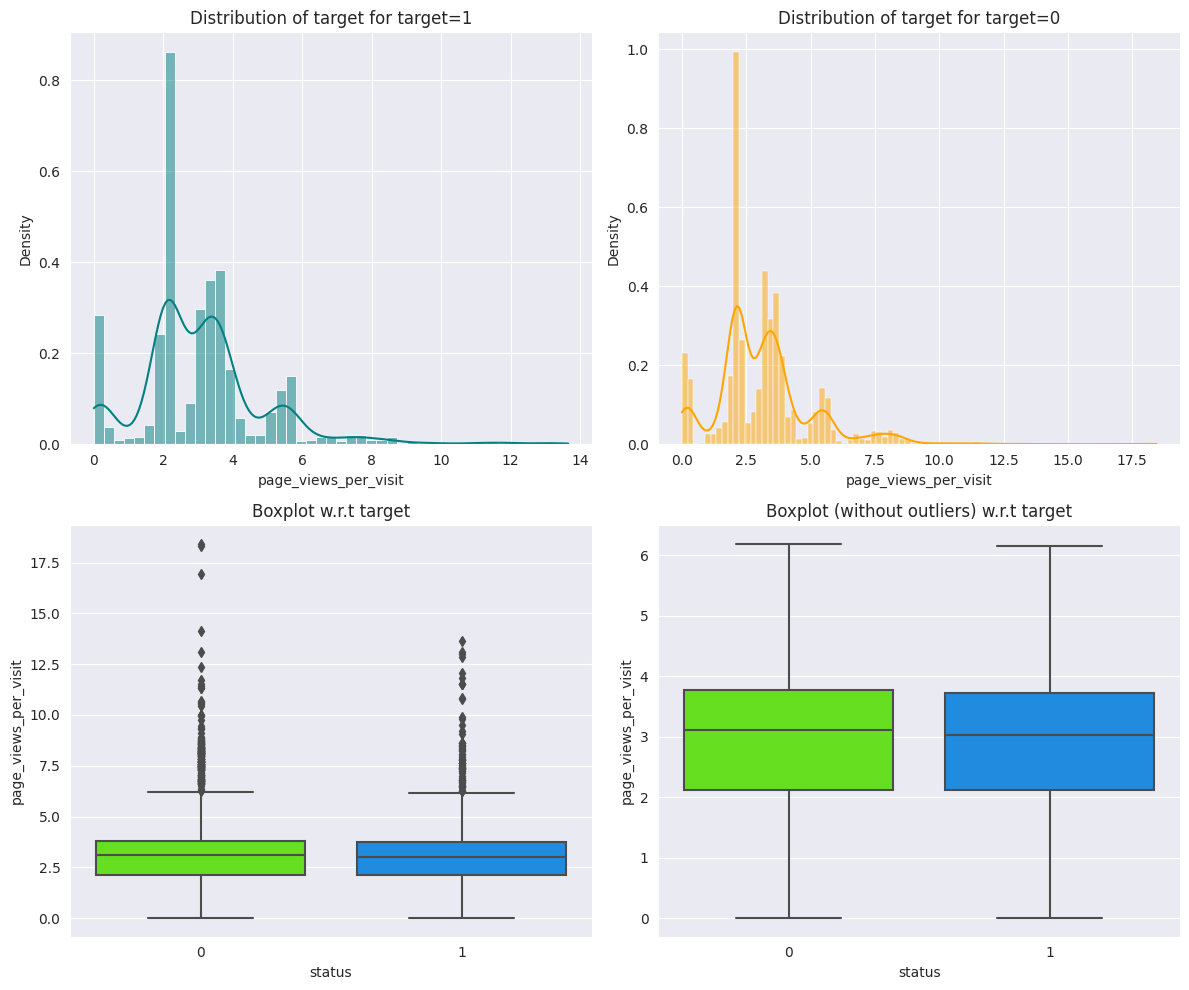

In [ ]:
distribution_plot_wrt_target(data, "page_views_per_visit", target="status")

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


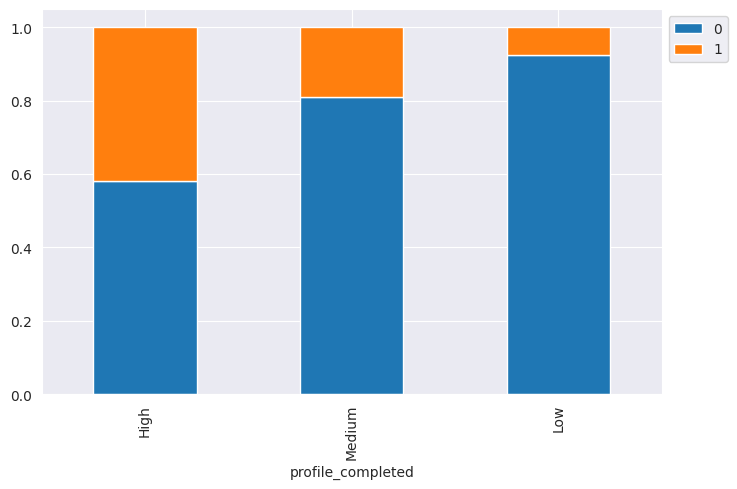

In [ ]:
stacked_barplot(data, predictor="profile_completed", target="status")

# Observations:
**Profile Completed vs. Status:**

Leads with 'High' profile completion have a higher conversion rate compared to 'Medium' and 'Low'.
Non-completed profiles have a lower conversion rate.
Print Media Type 1 vs. Status:


Let's see how advertisement and referrals impact the lead status

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


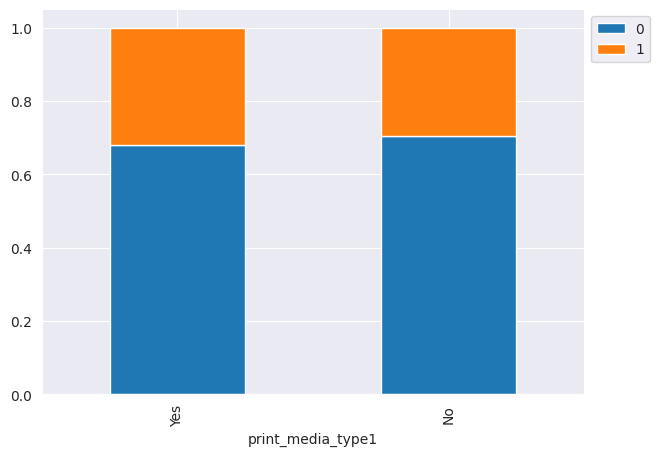

In [ ]:
stacked_barplot(data, predictor="print_media_type1", target="status")

# Observations:

**Print Media Type 1 vs. Status:**

The majority of leads have not seen Print Media Type 1 (Newspaper ad).
Leads who have seen Print Media Type 1 have a slightly higher conversion rate.


status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


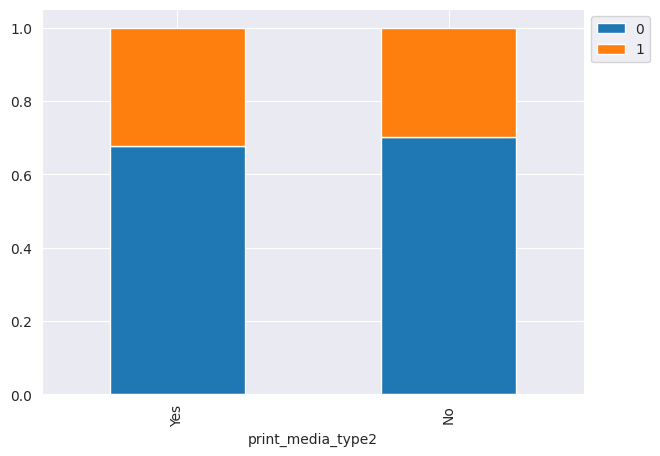

In [ ]:
stacked_barplot(data, predictor="print_media_type2", target="status")

# Observations:
**Print Media Type 2 vs. Status:**

Most leads have not seen Print Media Type 2 (Magazine ad).
Conversion rate is slightly higher for leads who have seen Print Media Type 2.


status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


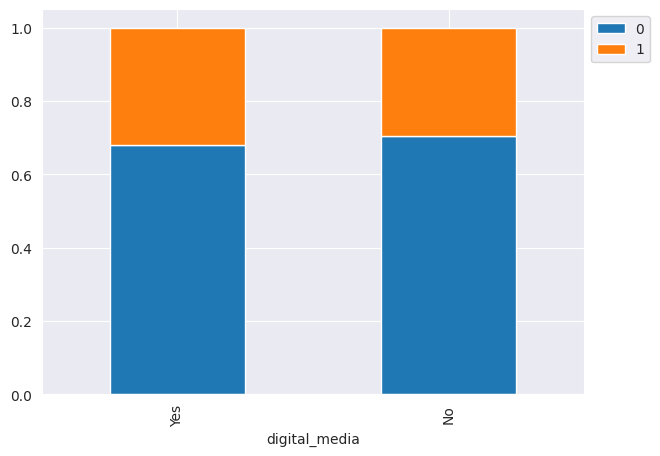

In [ ]:
stacked_barplot(data, predictor="digital_media", target="status")


# Observations:

**Digital Media vs. Status:**

The majority of leads have not seen Digital Media ads.
Conversion rate is slightly higher for leads who have seen Digital Media ads.


status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


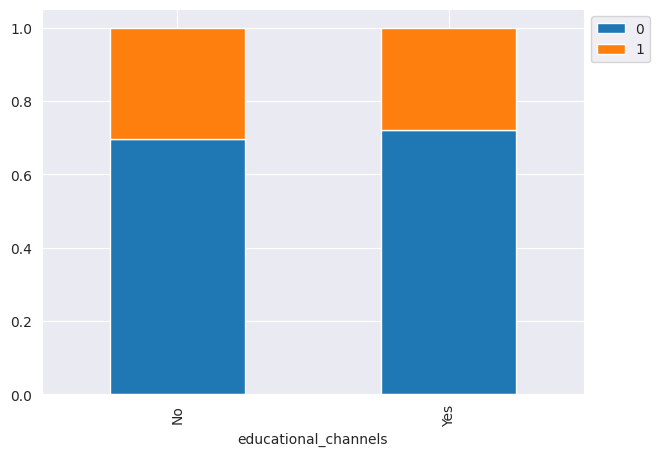

In [ ]:
stacked_barplot(data, predictor="educational_channels", target="status")


# Observations:

**Educational Channels vs. Status:**

Most leads have not heard about ExtraaLearn through educational channels.
Conversion rate is higher for leads who have heard about ExtraaLearn through educational channels.


###**Outlier Check**

Let's check for outliers in the data.

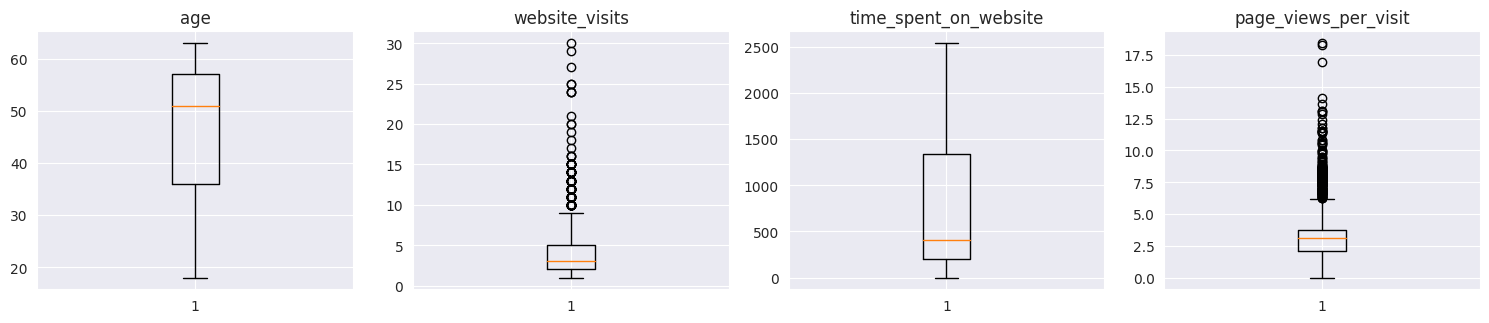

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping status
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High         7.00000   
1   56       Professional        Mobile App            Medium         2.00000   
2   52       Professional           Website            Medium         3.00000   
3   53         Unemployed           Website              High         4.00000   
4   23            Student           Website              High         4.00000   

   time_spent_on_website  page_views_per_visit     last_activity  \
0             1639.00000               1.86100  Website Activity   
1               83.00000               0.32000  Website Activity   
2              330.00000               0.07400  Website Activity   
3              464.00000               2.05700  Website Activity   
4              600.00000              16.91400    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

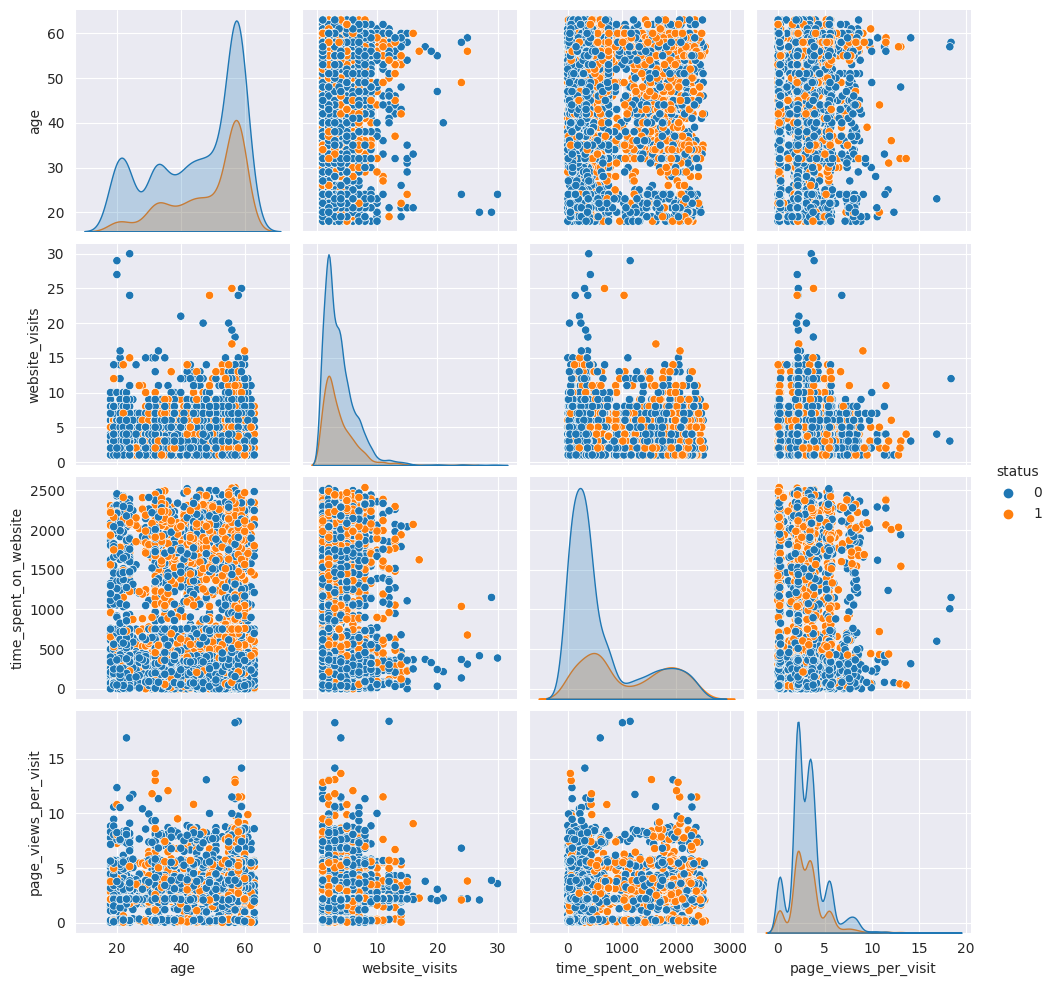

In [ ]:
sns.pairplot(data, hue="status")
plt.show()


# Observations:
There is no linear relation.
Age and Time spent have little relation.
Number of website visits and time spent on wesites have some relation.


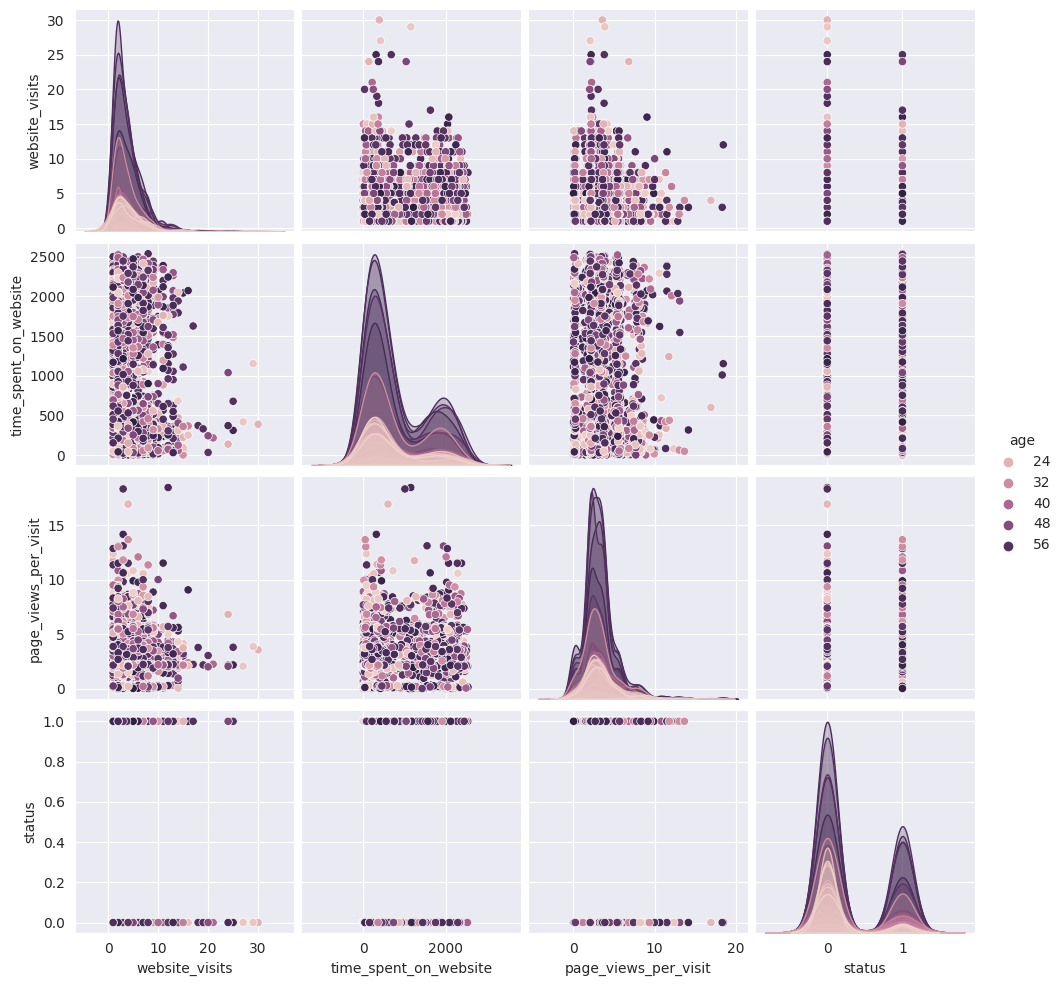

In [ ]:
sns.pairplot(data, hue="age")
plt.show()

In [ ]:
# Count the occurrences of each class
class_counts = data['status'].value_counts()
print(class_counts)

0    3235
1    1377
Name: status, dtype: int64


In [ ]:
# Count the occurrences of each class
class_counts = data['status'].value_counts(1)
print(class_counts)

0   0.70143
1   0.29857
Name: status, dtype: float64



# Observations:

These values suggest that approximately 70.14% of the leads in your dataset have a status of 1 (converted), while approximately 29.86% have a status of 0 (not converted).

Data Preparation for modeling
We want to predict which lead is more likely to be converted.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

###**Splitting data into train and test**

---



data.drop(["ID"], axis=1, inplace=True )  # Complete the code to drop "ID" column from data


In [ ]:
X = data.drop(["status"], axis=1)
Y = data["status"]

# adding a contstant to X variable
X = sm.add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [ ]:
X

const  age  website_visits  time_spent_on_website  \
0    1.00000   57         7.00000             1639.00000   
1    1.00000   56         2.00000               83.00000   
2    1.00000   52         3.00000              330.00000   
3    1.00000   53         4.00000              464.00000   
4    1.00000   23         4.00000              600.00000   
...      ...  ...             ...                    ...   
4607 1.00000   35        15.00000              360.00000   
4608 1.00000   55         8.00000             2327.00000   
4609 1.00000   58         2.00000              212.00000   
4610 1.00000   57         1.00000              154.00000   
4611 1.00000   55         4.00000             2290.00000   

      page_views_per_visit  current_occupation_Student  \
0                  1.86100                           0   
1                  0.32000                           0   
2                  0.07400                           0   
3                  2.05700                           0   
4                 16.91400                           1   
...                    ...                         ...   
4607               2.17000                           0   
4608               5.39300                           0   
4609               2.69200                           0   
4610               3.87900                           0   
4611               2.07500                           0   

      current_occupation_Unemployed  first_interaction_Website  \
0                                 1                          1   
1                                 0                          0   
2                                 0                          1   
3                                 1                          1   
4                                 0                          1   
...                             ...                        ...   
4607                              1                          0   
4608                              0                          0   
4609                              0                          1   
4610                              0                          0   
4611                              0                          1   

      profile_completed_Low  profile_completed_Medium  \
0                         0                         0   
1                         0                         1   
2                         0                         1   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
4607                      0                         1   
4608                      0                         1   
4609                      0                         0   
4610                      0                         1   
4611                      0                         1   

      last_activity_Phone Activity  last_activity_Website Activity  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               0   
...                            ...                             ...   
4607                             1                               0   
4608                             0                               0   
4609                             0                               0   
4610                             0                               1   
4611                             1                               0   

      print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
0                         1                      0                  1   
1                         0                      0                  0   
2                         0                      0 

**The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))

###Fitting Logistic Regression model

In [ ]:
# fitting the model on training set

lg = logit.fit(disp=False)

In [ ]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3211
Method:                           MLE   Df Model:                           16
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:                  0.3433
Time:                        16:45:29   Log-Likelihood:                -1292.6
converged:                       True   LL-Null:                       -1968.1
Covariance Type:            nonrobust   LLR p-value:                5.135e-278
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.6718      0.313     -8.547      0.000      -3.285      -2.059
age                                0.0058      0.005      1.120      0.

**OBSERVATION:**
Number of Observations: 3228
Residual Degrees of Freedom: 3211
Model Degrees of Freedom: 16
Pseudo R-squared: 0.3433 (an indicator of model fit)
Log-Likelihood: -1292.6 (the log-likelihood of the model)
LL-Null: -1968.1 (log-likelihood of a null model)
Converged: True (indicating that the optimization algorithm converged)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf



In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.82280 0.63900    0.73333 0.68293

**OBSERVATION: **
These metrics give insights into how well the logistic regression  model is performing on the training data.  

Accuracy is 0.82280 indicates that around 82.28% of instances are correctly classified by the model.

Recall is 0.63900 suggests that the model correctly identifies approximately
 63.90% of actual positive conversion.

Precision is 0.73333 indicates that around 73.33% of instances predicted as converted are actually converted.

**Multicollinearity**

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature      VIF
0                            const 39.51743
1                              age  1.99087
2                   website_visits  1.00466
3            time_spent_on_website  1.01620
4             page_views_per_visit  1.00675
5       current_occupation_Student  2.02880
6    current_occupation_Unemployed  1.07080
7        first_interaction_Website  1.00314
8            profile_completed_Low  1.03458
9         profile_completed_Medium  1.03018
10    last_activity_Phone Activity  1.13862
11  last_activity_Website Activity  1.13634
12           print_media_type1_Yes  1.00540
13           print_media_type2_Yes  1.00503
14               digital_media_Yes  1.00394
15        educational_channels_Yes  1.00659
16                    referral_Yes  1.00801

# Observations:

Values for the  majority of features indicate that multicollinearity is not a significant issue in our dataset. This suggests that the predictor variables can be considered relatively independent and suitable for building a logistic regression model.

### Dropping high p variabled

Dropping high p-value variables:

We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.

But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

Instead, we will do the following:
Build a model
 check the p-values of the variables, and drop the column with the highest p-value.

 Create a new model without the dropped feature,

 check the p-values of the variables, and drop the column with the highest p-value.


Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
data.describe

<bound method NDFrame.describe of       age current_occupation first_interaction profile_completed  \
0      57         Unemployed           Website              High   
1      56       Professional        Mobile App            Medium   
2      52       Professional           Website            Medium   
3      53         Unemployed           Website              High   
4      23            Student           Website              High   
...   ...                ...               ...               ...   
4607   35         Unemployed        Mobile App            Medium   
4608   55       Professional        Mobile App            Medium   
4609   58       Professional           Website              High   
4610   57       Professional        Mobile App            Medium   
4611   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
0            7.00000             1639.00000               1.86100   
1          

# Observations:

4612 rows x 14 columns

Age Distribution: The majority of individuals in the dataset seem to be in their mid-40s to early 50s, with an average age of approximately 46.20. The ages range from 18 to 63, indicating a diverse age group.

Website Engagement: On average, individuals visit the website around 3.71 times. The number of website visits per individual varies, with some visiting up to 30 times. This suggests a range of engagement levels with the website.

Time Spent on Website: The average time spent on the website is approximately 12.54 minutes (752.40 seconds). This metric varies widely, with some spending just a few seconds and others spending up to 42 minutes (2537 seconds).

Page Views per Visit: On average, users view around 3.15 pages per visit. The number of pages viewed per visit ranges from less than 1 to over 18, indicating variability in user navigation behavior.

Status Distribution: The "status" column is a binary variable, indicating whether an individual has a specific status (0 or 1). The average value is approximately 0.30, which means that about 30% of individuals have the status of 1.

These observations


In [ ]:
X_train

const  age  website_visits  time_spent_on_website  \
389  1.00000   57         1.00000              582.00000   
1162 1.00000   35         2.00000             1937.00000   
1057 1.00000   53         5.00000             1554.00000   
436  1.00000   52         7.00000               15.00000   
946  1.00000   57         3.70662              752.39748   
...      ...  ...             ...                    ...   
4544 1.00000   56         7.00000              177.00000   
2615 1.00000   54         1.00000             1139.00000   
2441 1.00000   47         2.00000             1605.00000   
438  1.00000   56         7.00000              242.00000   
2455 1.00000   29         4.00000              139.00000   

      page_views_per_visit  current_occupation_Student  \
389                2.19700                           0   
1162               5.11100                           0   
1057               2.12300                           0   
436                4.38200                           0   
946                3.14974                           0   
...                    ...                         ...   
4544               2.22800                           0   
2615               5.45000                           0   
2441               3.70600                           0   
438                5.55200                           0   
2455               3.64800                           0   

      current_occupation_Unemployed  first_interaction_Website  \
389                               0                          0   
1162                              1                          1   
1057                              1                          1   
436                               0                          1   
946                               0                          1   
...                             ...                        ...   
4544                              1                          1   
2615                              1                          0   
2441                              0                          0   
438                               1                          0   
2455                              0                          0   

      profile_completed_Low  profile_completed_Medium  \
389                       0                         0   
1162                      0                         1   
1057                      0                         1   
436                       0                         0   
946                       0                         0   
...                     ...                       ...   
4544                      0                         1   
2615                      0                         0   
2441                      0                         1   
438                       0                         1   
2455                      0                         1   

      last_activity_Phone Activity  last_activity_Website Activity  \
389                              0                               0   
1162                             0                               0   
1057                             0                               0   
436                              0                               0   
946                              0                               0   
...                            ...                             ...   
4544                             1                               0   
2615                             0                               0   
2441                             0                               0   
438                              0                               0   
2455                             0                               1   

      print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
389                       0                      0                  0   
1162                      0                      0                  1   
1057                      0                      0 

## Observations:
3228 rows × 17 columns

In [ ]:
 X_train[cols]

website_visits  time_spent_on_website  page_views_per_visit
389          1.00000              582.00000               2.19700
1162         2.00000             1937.00000               5.11100
1057         5.00000             1554.00000               2.12300
436          7.00000               15.00000               4.38200
946          3.70662              752.39748               3.14974
...              ...                    ...                   ...
4544         7.00000              177.00000               2.22800
2615         1.00000             1139.00000               5.45000
2441         2.00000             1605.00000               3.70600
438          7.00000              242.00000               5.55200
2455         4.00000              139.00000               3.64800

[3228 rows x 3 columns]

In [ ]:
 y_train

389     0
1162    0
1057    1
436     1
946     1
       ..
4544    0
2615    0
2441    0
438     0
2455    0
Name: status, Length: 3228, dtype: int64

In [ ]:
print(X_train.dtypes)

const                             float64
age                                 int64
website_visits                    float64
time_spent_on_website             float64
page_views_per_visit              float64
current_occupation_Student          uint8
current_occupation_Unemployed       uint8
first_interaction_Website           uint8
profile_completed_Low               uint8
profile_completed_Medium            uint8
last_activity_Phone Activity        uint8
last_activity_Website Activity      uint8
print_media_type1_Yes               uint8
print_media_type2_Yes               uint8
digital_media_Yes                   uint8
educational_channels_Yes            uint8
referral_Yes                        uint8
dtype: object


In [ ]:
import pandas as pd

# Loop through the columns in cols and check if they are numeric
numeric_cols = [col for col in cols if pd.api.types.is_numeric_dtype(X_train[col])]

print(numeric_cols)

['website_visits', 'time_spent_on_website', 'page_views_per_visit']


In [ ]:
import pandas as pd

# initial list of columns
cols = X_train.columns.tolist()

# Filter numeric columns
numeric_cols = [col for col in cols if pd.api.types.is_numeric_dtype(X_train[col])]

# setting an initial max p-value
max_p_value = 1

while len(numeric_cols) > 0:
    # defining the train set using only numeric columns
    x_train_aux = X_train[numeric_cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    print("{} {}".format(feature_with_p_max, max_p_value))

    if max_p_value > 0.05:
        numeric_cols.remove(feature_with_p_max)
    else:
        break

selected_features = numeric_cols
print(selected_features)


print_media_type2_Yes 0.7452139950433015
page_views_per_visit 0.6137726797517165
website_visits 0.5861170803510096
digital_media_Yes 0.5690708032459938
print_media_type1_Yes 0.4714677410983832
educational_channels_Yes 0.43014453036881395
age 0.11194403625958342
referral_Yes 2.4834162760852886e-06
['const', 'time_spent_on_website', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'referral_Yes']


The output indicates that the features "print_media_type2_Yes," "page_views_per_visit," "website_visits," "digital_media_Yes," "print_media_type1_Yes," "educational_channels_Yes," "age," and "referral_Yes" were removed from the model due to having p-values greater than 0.05.

The remaining features listed at the end are those that remained in the model.

In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
import statsmodels.api as sm

logit1 = sm.Logit(y_train, X_train1)  # Train logistic regression on X_train1 and y_train
lg1 = logit1.fit()  # Fit logistic regression model
print(lg1.summary())  # Print summary of the model

Optimization terminated successfully.
         Current function value: 0.401135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3218
Method:                           MLE   Df Model:                            9
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:                  0.3421
Time:                        16:45:29   Log-Likelihood:                -1294.9
converged:                       True   LL-Null:                       -1968.1
Covariance Type:            nonrobust   LLR p-value:                2.759e-284
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4565      0.138    -17.792     

**Observation:** Overall, this and last models seem to have performed similarly in terms of goodness of fit and significance.

The pseudo R-squared values are quite close, with the first model having 0.3421 and the second model having 0.3433.

The first model retains a reduced number of predictors (9) compared to the original model (16)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf




In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.82435 0.64004    0.73716 0.68517

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  time_spent_on_website  current_occupation_Student  \
Odds          0.08574                1.00117                     0.14044   
Change_odd% -91.42639                0.11702                   -85.95589   

             current_occupation_Unemployed  first_interaction_Website  \
Odds                               0.55208                   13.68628   
Change_odd%                      -44.79174                 1268.62791   

             profile_completed_Low  profile_completed_Medium  \
Odds                       0.07241                   0.19691   
Change_odd%              -92.75876                 -80.30907   

             last_activity_Phone Activity  last_activity_Website Activity  \
Odds                              0.47313                         1.83573   
Change_odd%                     -52.68734                        83.57283   

             referral_Yes  
Odds              4.29165  
Change_odd%     329.16481

**OBSERVATION: **These odds ratios and percentage changes provide insights into how each predictor variable affects the odds of the event (likely "status") occurring. They can help you understand the relative importance and impact of each predictor on the outcome variable.

Being a student is associated with a 0.14044 times decrease in the odds of the student converting. The odds decrease by around 85.96%.
Being unemployed is associated with a 0.55208 times decrease in the odds of the unemployed person converting. The odds decrease by around 44.79%.

If the first interaction was via the website (compared to other modes), the odds of the event occurring are approximately 13.68628 times higher. This corresponds to an increase of around 1268.63% in the odds.

#### Checking model performance on the training set

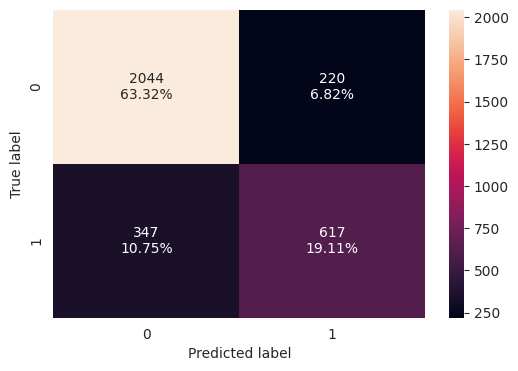

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

**Observations:**
True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 63.22% of cases where actual value was also negative.
False Positive (FP): The model predicted False positive outcome 6.82% of cases where actual value was 0.
False Negative (FN): The model predicted false negative outcome 10.75% of cases where actual value was 1.
True Positive (TP): The model predicted positive outcome 19.11% of cases where actual value also was postitive.

True recall% = 19.11%


In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
print(log_reg_model_train_perf)

Training performance:
   Accuracy  Recall  Precision      F1
0   0.82435 0.64004    0.73716 0.68517


In the given output, the accuracy is approximately 0.82435, which means that around 82.44% of the instances were predicted correctly by the model.

recall is approximately 0.64004, indicating that the model correctly identified about 64.00% of the actual positive instances.

 In the output, the precision is approximately 0.73716, indicating that about 73.72% of the instances predicted as positive were actually positive.

#### ROC-AUC
* ROC-AUC on training set

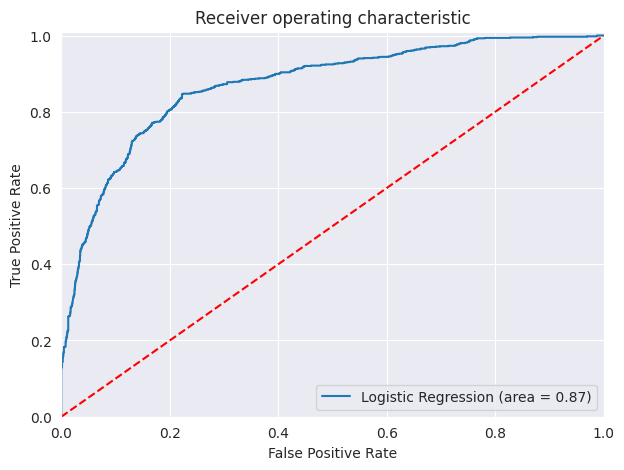

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observations**Model is initially identifying only a small portion of the true positive cases, resulting in a low sensitivity.

 As the threshold is increased, the true positive rate quickly increases to around 0.8. This abrupt rise indicates that the model starts correctly identifying a higher proportion of positive cases as the threshold increases. The model is becoming more sensitive, capturing more true positive cases.

 The false positive rate is reported as 2.4, which is quite high. This suggests that, at the same time when the true positive rate is increasing rapidly, the model is also classifying a significant portion of negative cases as positive.

 In summary, the described behavior in the ROC curve suggests a trade-off between sensitivity (true positive rate) and specificity (true negative rate) as the threshold changes.  


### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.27667162850585336


**Observations: **The threshold value of 0.27667162850585336 represents the probability threshold to use to classify instances into the positive class (1) or the negative class (0) based on the logistic regression model.

Determined that using a threshold of 0.27667162850585336 provides an optimal balance between true positive rate (sensitivity) and false positive rate (1-specificity) based on the ROC curve analysis.


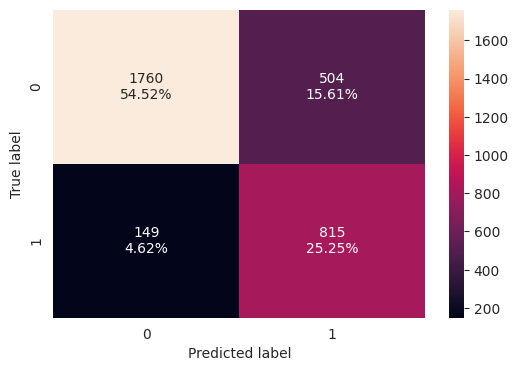

In [ ]:
#  create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=0.27667162850585336
)

**Observation**  :
True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 54.52% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 15.61% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 4.62% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 25.25% of cases where actual value also was postitive.

True recall% = 25.25%

Model has improved True positive prediction but dopped True negative rate, False Negative rate dropped to 4.62%.

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79771 0.84544    0.61789 0.71397

In the given output, the accuracy is approximately 79%, which means that around 79% of the instances were predicted correctly by the model.

recall is approximately 84%, indicating that the model correctly identified about 84.00% of the actual positive instances.

 In the output, the precision is approximately 0.61, indicating that about 73.61% of the instances predicted as positive were actually positive.

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
# To get diferent metric scores
from sklearn.metrics import (
    precision_recall_curve
)

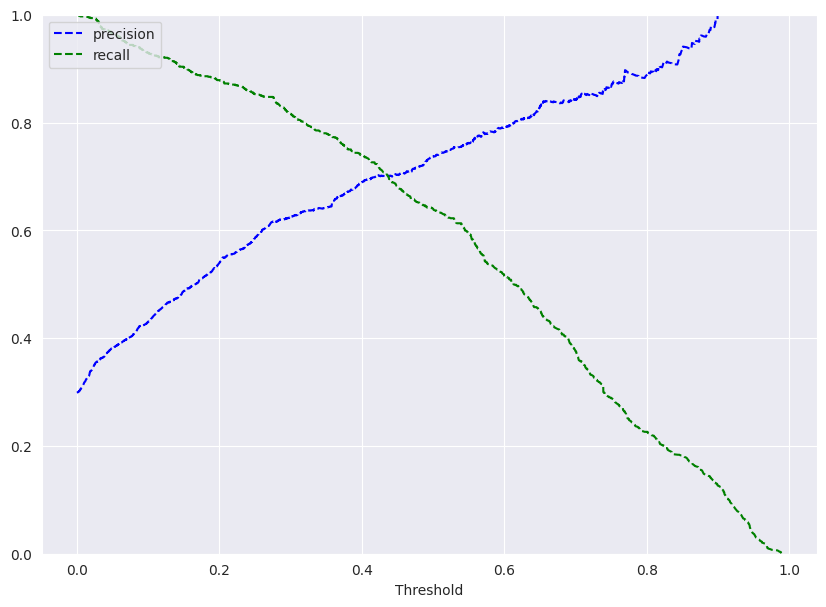

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

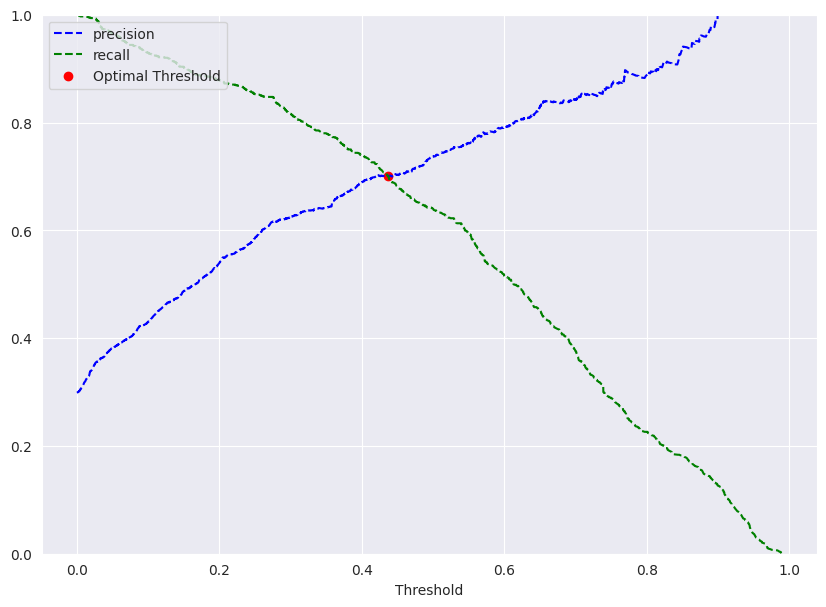

Optimal Threshold: 0.4368300225094309


In [ ]:
# Calculate the difference between precision and recall
diff = np.abs(prec - rec)

# Find the index of the minimum difference
optimal_threshold_index = np.argmin(diff)

# Retrieve the optimal threshold value
optimal_threshold = tre[optimal_threshold_index]

# Plot the precision-recall curve with the optimal threshold point
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.scatter(optimal_threshold, prec[optimal_threshold_index], c='r', marker='o', label='Optimal Threshold')
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

print("Optimal Threshold:", optimal_threshold)


In [ ]:
# setting the threshold
optimal_threshold_curve = 0.44

**Observations:**
If the predicted probability for an instance is greater than or equal to 0.44, the instance will be classified as converted applications.


If the predicted probability for an instance is less than 0.44, the instance will be classified as non converted applications.


#### Checking model performance on training set

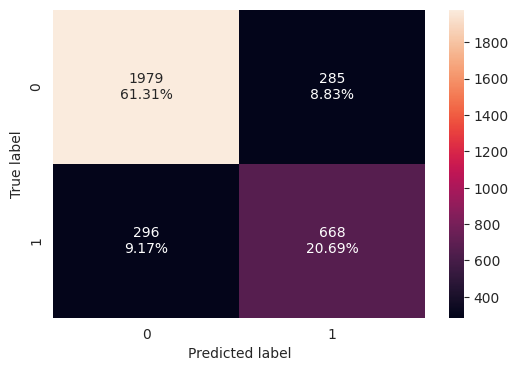

In [ ]:
# creating confusion matrix with optimal_threshold_curve as threshold
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve )

**Observation**  :
True Negative (predicted = 0 and true = 0 ): The model correctly predicted a negative outcome 61.31%. Before that it was 53.53%.
False Positive (FP): The model incorrectly predicted a positive outcome  
8.83%. Last time it was 15.61% times.
False Negative (FN): The model incorrectly predicted a negative outcome 9.17%. Last time it was 4.62% times.
True Positive (TP): The model correctly predicted a positive outcome 20.69%. Up from 25.25% times.


In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.82001 0.69295    0.70094 0.69692

**Observation: **
In the given output, the accuracy is approximately 82%, which means that around 82% of the instances were predicted correctly by the model.

recall is approximately 69%, indicating that the model correctly identified about 69.00% of the actual positive instances.

In the output, the precision is approximately 70%, indicating that about 70% of the instances predicted as positive were actually positive.

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.82803 0.69249    0.72040 0.70617

**Observation: **
In the given output, the accuracy is approximately 58%, which means that around 58% of the instances were predicted correctly by the model.

recall is approximately 28%, indicating that the model correctly identified about 42.00% of the actual positive instances.

In the output, the precision is approximately 30%, indicating that about 30% of the instances predicted as positive were actually positive.

### Let's check the performance on the test set

Using model with default threshold

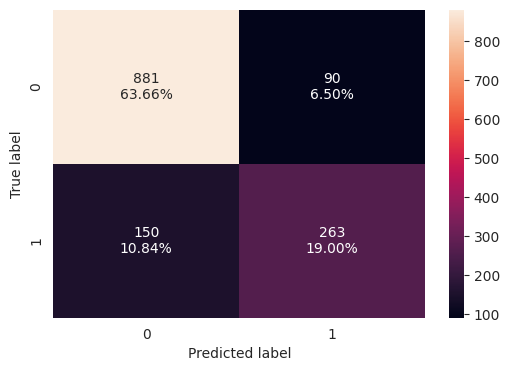

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)


**OBSERVATIONS:**

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 63.66% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 6.50% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 10.84% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 19% of cases where actual value also was postitive.

True recall% = 19%

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
print("Test performance:")
print(log_reg_model_test_perf)


Test performance:
   Accuracy  Recall  Precision      F1
0   0.82659 0.63680    0.74504 0.68668


Observation:

Based on the test performance metrics of the logistic regression model:

1.	Accuracy: The model has an accuracy of approximately 82.66%. This indicates that about 82.66% of the predictions made by the model are correct.

2.	Recall: The recall score is around 0.6368. This means that the model is able to correctly identify about 63.68% of the actual positive cases in the dataset.

3.	Precision: The precision score is about 0.74504. This implies that out of the instances the model predicted as positive, approximately 74.50% of them are actually true positive cases.

4.	F1-score: The F1-score is approximately 0.68668. This score considers both precision and recall, providing a balanced measure of the model's performance.


* ROC curve on test set

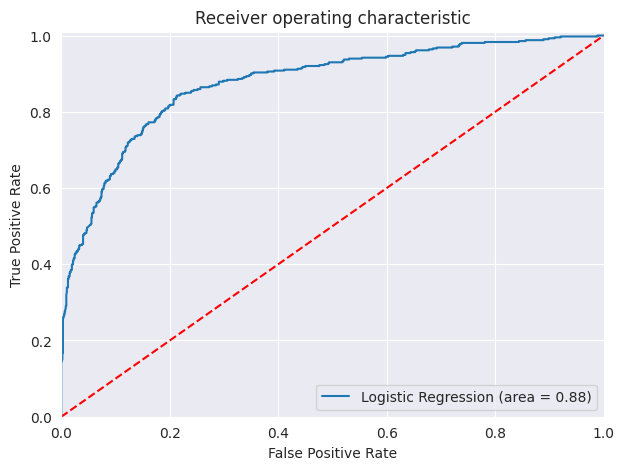

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observations**Model is initially identifying only a small portion of the true positive cases, resulting in a low sensitivity.

 As the threshold is increased, the true positive rate quickly increases to around 0.82. This abrupt rise indicates that the model starts correctly identifying a higher proportion of positive cases as the threshold increases. The model is becoming more sensitive, capturing more true positive cases.

 The false positive rate is reported as 2, which is quite high. This suggests that, at the same time when the true positive rate is increasing rapidly, the model is also classifying a significant portion of negative cases as positive.

 In summary, the described behavior in the ROC curve suggests a trade-off between sensitivity (true positive rate) and specificity (true negative rate) as the threshold changes.  

Using model with threshold

#### Checking model performance on training set

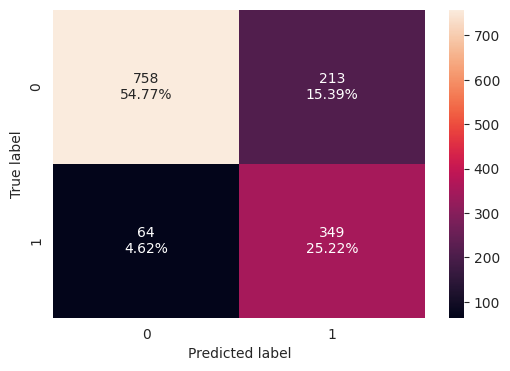

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

**Observations:**
True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 54.77% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 15.39% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 4.62% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 25.22% of cases where actual value also was postitive.

True recall% = 25.22%

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79986 0.84504    0.62100 0.71590

Observation:
The test performance metrics for the model is as follows:

Accuracy: 0.79986

Recall: 0.84504

Precision: 0.62100

F1 Score: 0.71590

**Using model with threshold =

## Model performance sumamry

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.82435   
Recall                                   0.64004   
Precision                                0.73716   
F1                                       0.68517   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79771   
Recall                                0.84544   
Precision                             0.61789   
F1                                    0.71397   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.82001  
Recall                                0.69295  
Precision                             0.70094  
F1                                    0.69692

Initial logistic regression without sampling and regularization has given a generalized performance on training and validation set.

We can see that first model is the best, let's check the performance of test data

## Model performance evaluation

In [ ]:
# Test performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.82659   
Recall                                   0.63680   
Precision                                0.74504   
F1                                       0.68668   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79986   
Recall                                0.84504   
Precision                             0.62100   
F1                                    0.71590   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.82803  
Recall                                0.69249  
Precision                             0.72040  
F1                                    0.70617

**Observations**
If accuracy is your primary concern, the "Logistic Regression - Default
 Threshold" model has the highest accuracy (0.82659).  This model achieves an accuracy of 82.66% on the test data. The recall is 63.68%, indicating that it correctly identifies about 63.68% of the positive cases. The precision is 74.50%, which means that when it predicts a positive case, it's accurate to that degree.

## Building a Decision Tree model

In [ ]:
X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X)  # Creating dummies for X

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Using GridSearch for Hyperparameter tuning of our tree model

### Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

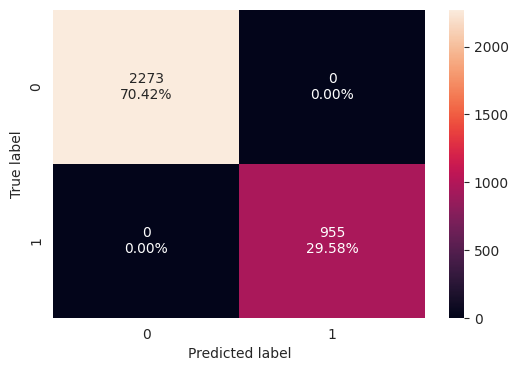

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

**Observation**  :

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 70.42% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 0% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 0% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 29.58% of cases where actual value also was postitive.

True recall% = 29.58%


In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

**Observations:**

Accuracy: 1.000 (100%): This means that all predictions made by the model match the actual. Every application's conversion status was predicted correctly.

Recall: 1.000 (100%): The model correctly identified all the positive cases (converted applications) in the dataset. There are no false negatives; the model has captured all positive instances.

Precision: 1.000 (100%): Every application the model predicted as positive (converted) was indeed a positive case. There are no false positives; the model didn't mistakenly classify any non-converted application as converted.

F1 Score: 1.000 (100%): The F1 score is the harmonic mean of precision and recall. Since both precision and recall are perfect, the F1 score is also perfect.

#### Checking model performance on test set

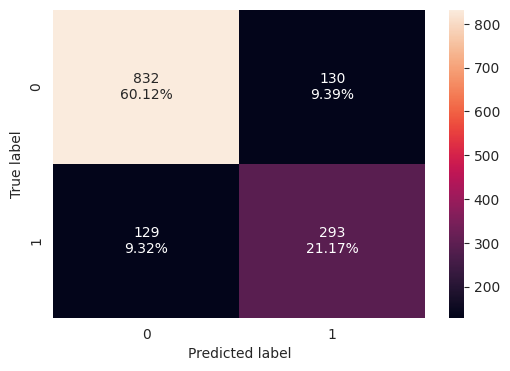

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

**Observation**  : On test data.

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 60.12% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 9.39% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 9.325% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 21.17% of cases where actual value also was postitive.

True recall% on test data = 21.17%

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.81286 0.69431    0.69267 0.69349

**Observation**:
The test performance metrics for the model is as follows:

Accuracy: 0.81

Recall: 0.69

Precision: 0.69

F1 Score: 0.69

**Before pruning the tree let's check the important features.**

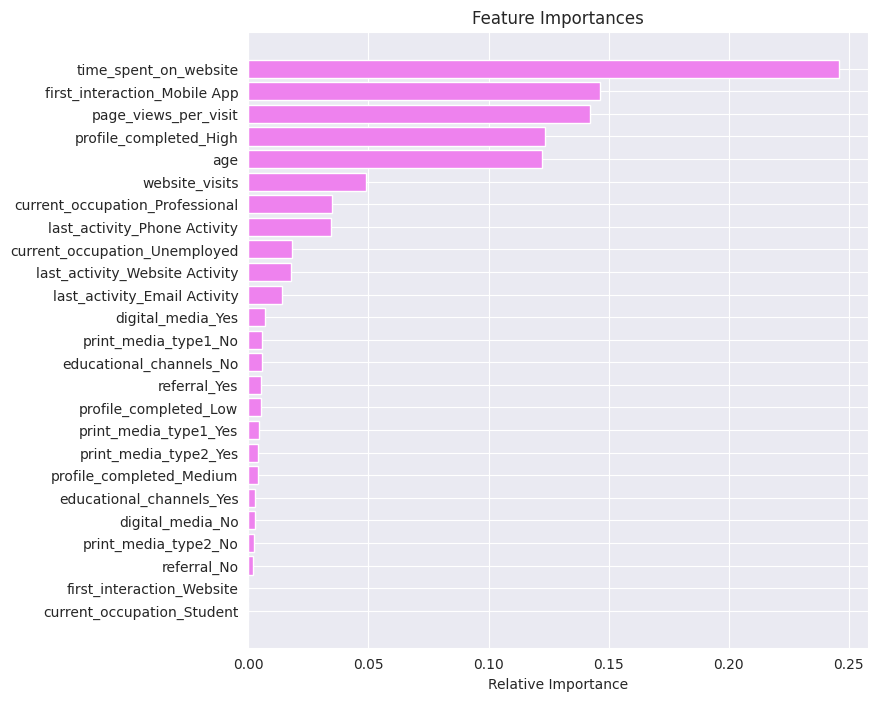

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This plot will show us how easy to understand which features are contributing the most to the model's predictions. Features with higher bars have higher importance in the model's decision-making process. Time spent, First interaction on mobile app, page views per visit, high profile completion and age are the most influencing column values.

### Pruning the tree

Pre-Pruning

In [ ]:
# To get diferent metric scores
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],
    "min_samples_split": [2, 5, 7, 10, 20, 30],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_leaf_nodes=20, random_state=1)

**Observation**  Max depth of tree set to 5 and max number of leaf nodes to 20.

####Check the performance on training set

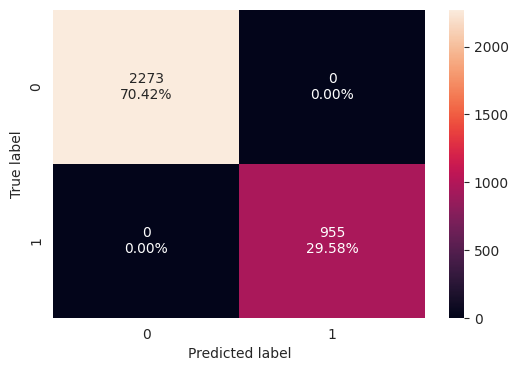

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train



Accuracy  Recall  Precision      F1
0   0.83240 0.88168    0.66299 0.75685

#### Checking performance on test set

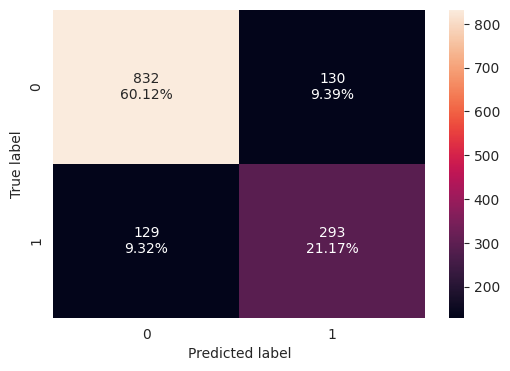

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

Observation : On test data.

True Negative (predicted = 0 and true = 0 ): The model correctly predicted a negative outcome 60.12%.

False Positive (predicted = 1 and true = 0): The model incorrectly predicted a positive outcome 9.39% times.

False Negative (predicted = 0 and true = 1): The model incorrectly predicted a negative outcome 9.32%.

True Positive (predicted = 1 and true = 1): The model correctly predicted a positive outcome 21.17%.

True recall% = 21.17%


In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.82803 0.86256    0.66912 0.75362

Observation:
The test performance metrics has lower accuracy than training performance.

**Observation**   
With less nodes and depth restricted performance from 100% to the numbers above.

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'current_occupation_Professional', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Mobile App', 'first_interaction_Website', 'profile_completed_High', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Email Activity', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'print_media_type1_No', 'print_media_type1_Yes', 'print_media_type2_No', 'print_media_type2_Yes', 'digital_media_No', 'digital_media_Yes', 'educational_channels_No', 'educational_channels_Yes', 'referral_No', 'referral_Yes']


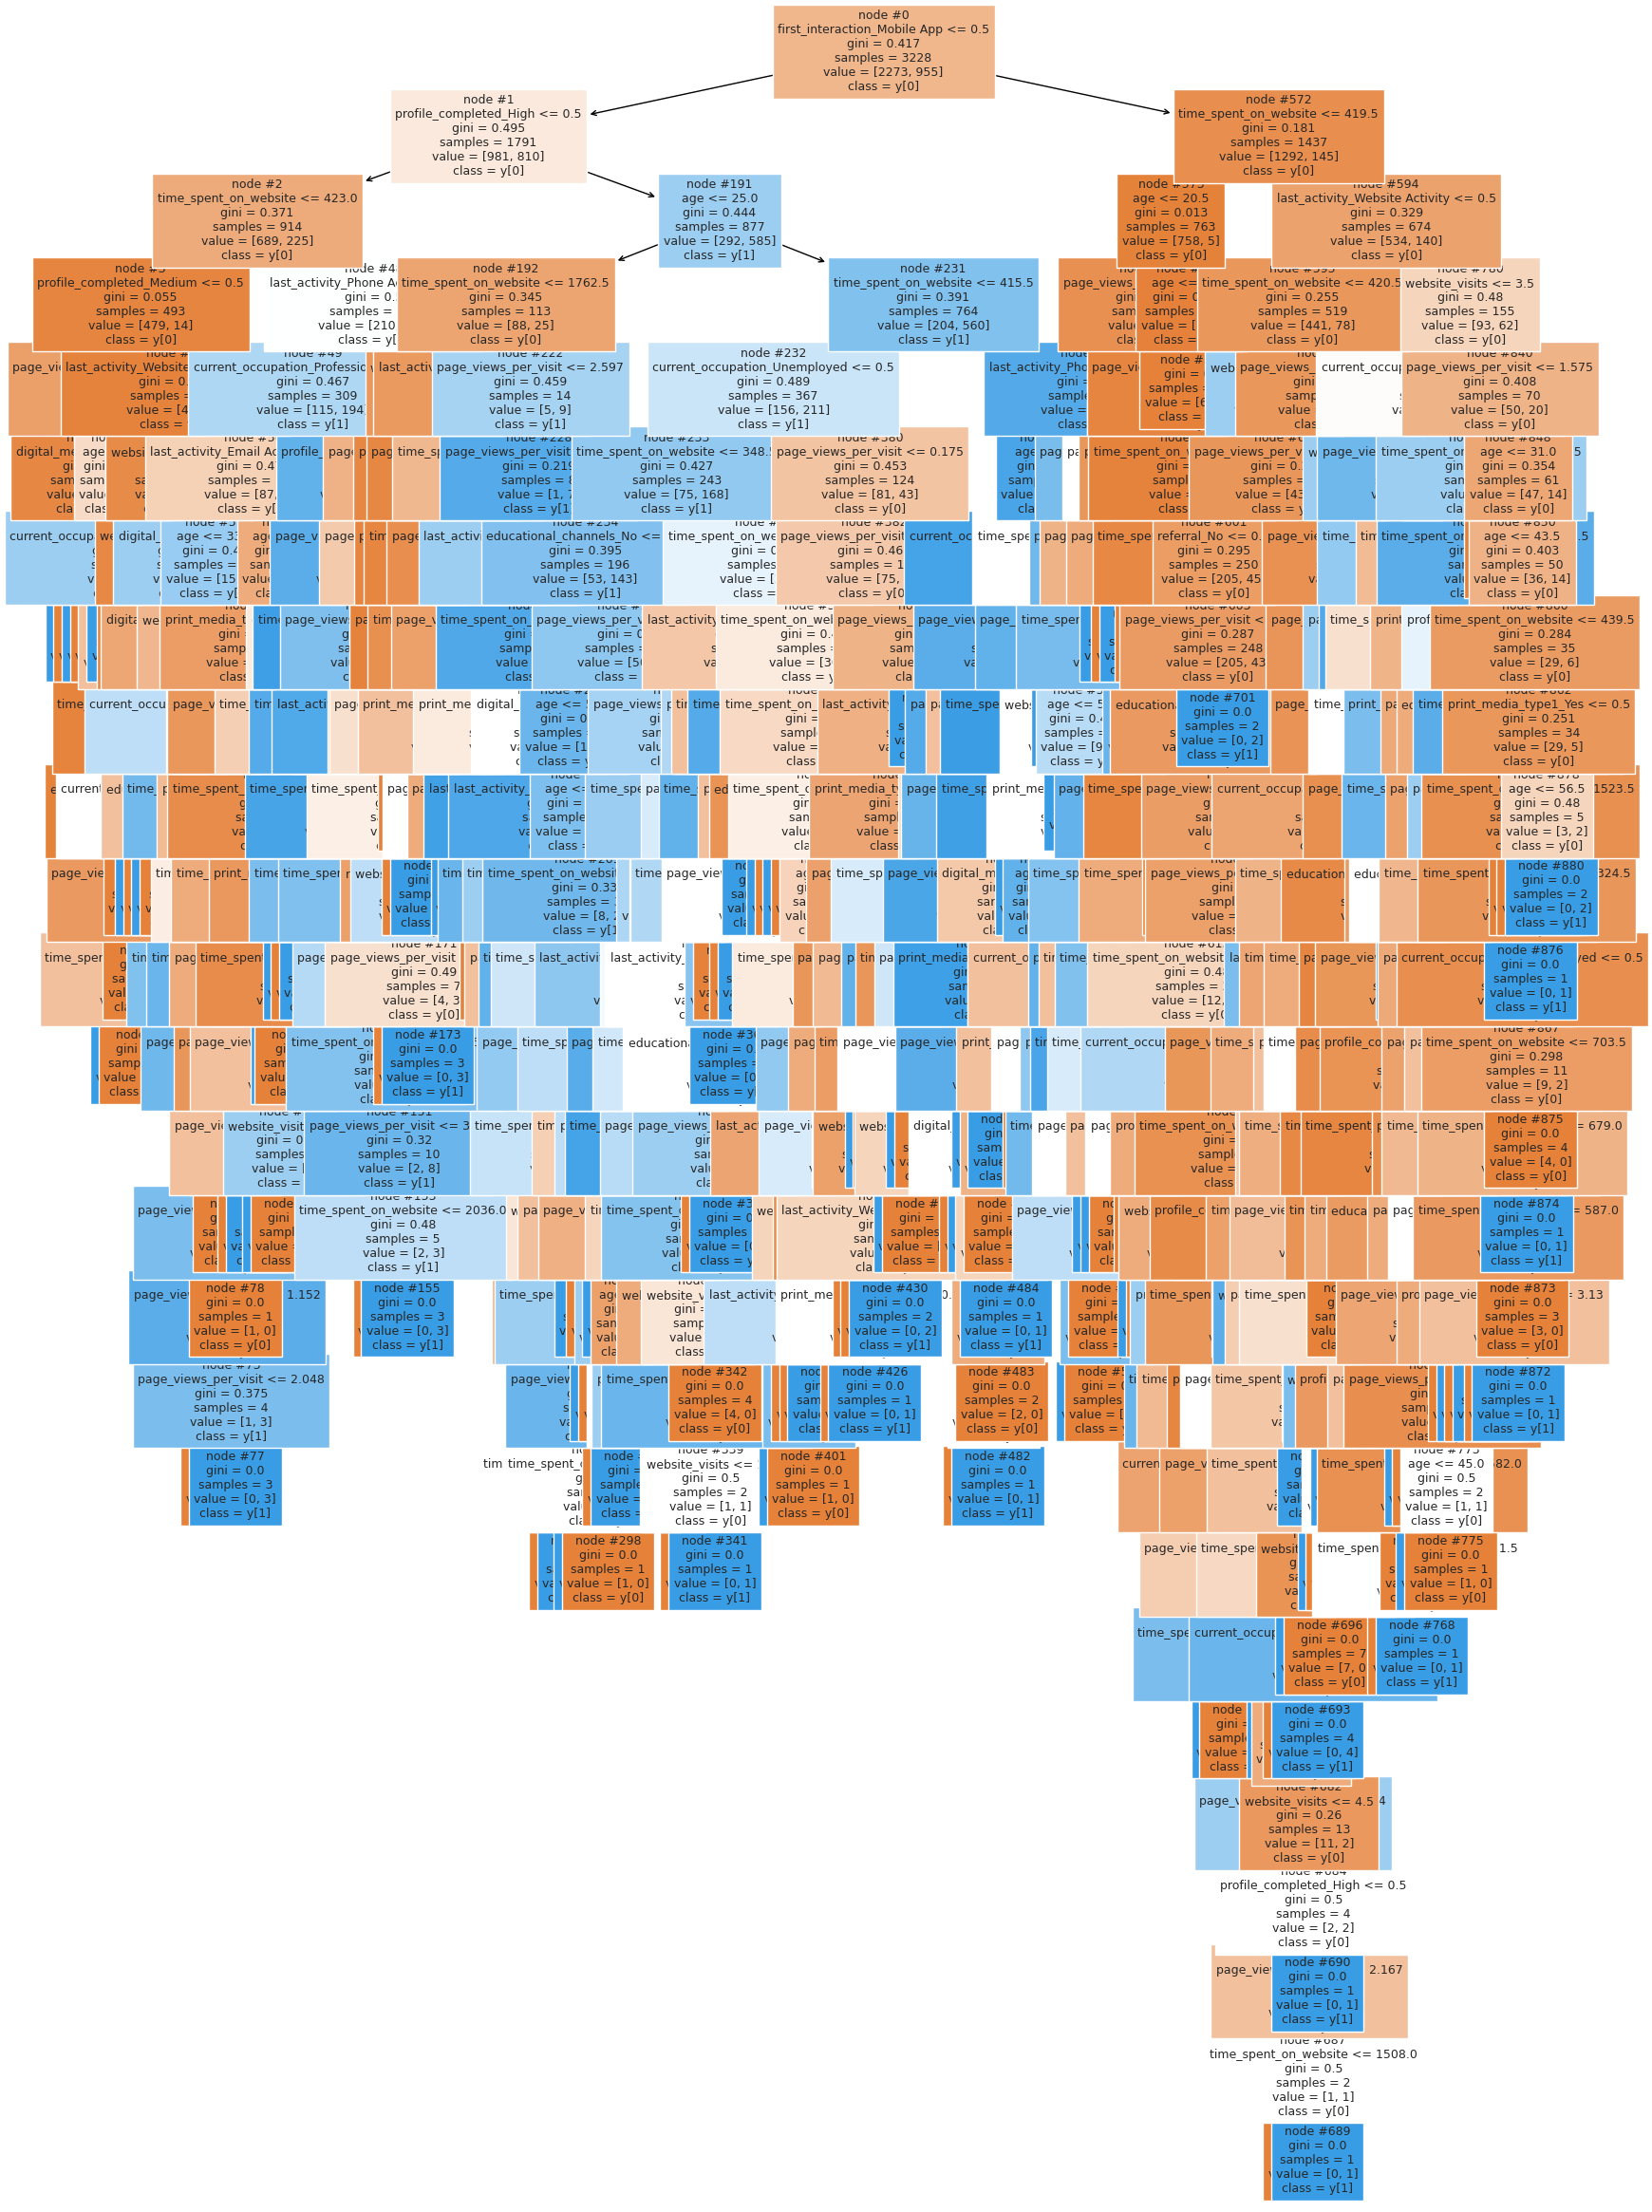

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- first_interaction_Mobile App <= 0.50
|   |--- profile_completed_High <= 0.50
|   |   |--- time_spent_on_website <= 423.00
|   |   |   |--- profile_completed_Medium <= 0.50
|   |   |   |   |--- page_views_per_visit <= 3.48
|   |   |   |   |   |--- digital_media_Yes <= 0.50
|   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |--- digital_media_Yes >  0.50
|   |   |   |   |   |   |--- age <= 43.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- age >  43.00
|   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- page_views_per_visit >  3.48
|   |   |   |   |   |--- age <= 50.00
|   |   |   |   |   |   |--- page_views_per_visit <= 3.66
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- page_views_per_visit >  3.66
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- age >  50.00
|   |   |   |   |   |   |---

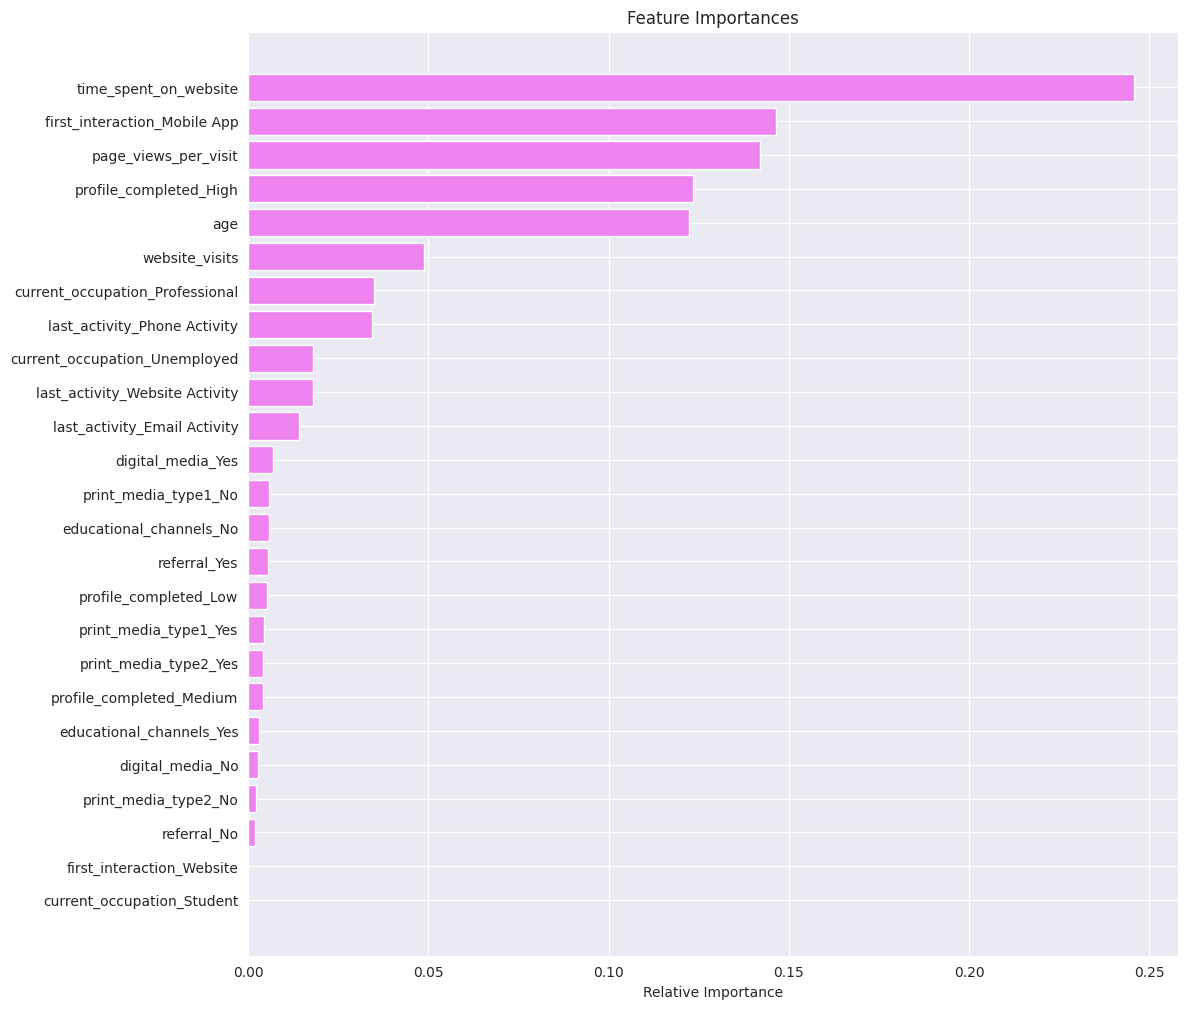

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 1,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001)

#### Checking performance on training set

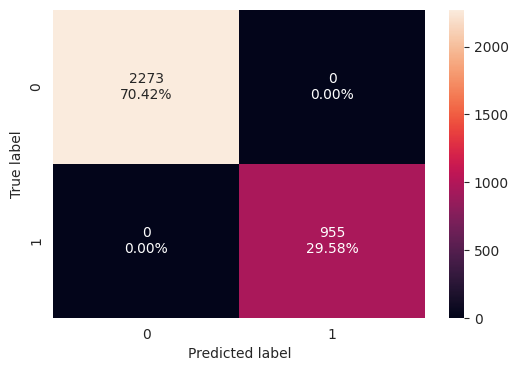

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

Observation : On train data, with less number of nodes.

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 70.42% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 0% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 0% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 29.58% of cases where actual value also was postitive.

True recall% = 29.58%

#### Checking performance on test set

In [ ]:
decision_tree_train_perf = model_performance_classification_sklearn(estimator, X_train, y_train)
print("Training performance:")
print(decision_tree_train_perf)

Training performance:
   Accuracy  Recall  Precision      F1
0   0.83240 0.88168    0.66299 0.75685


Observation:
The test performance metrics for the model is as follows:

Accuracy: 0.95

Recall: 0.91

Precision: 0.95

F1 Score: 0.93

Here

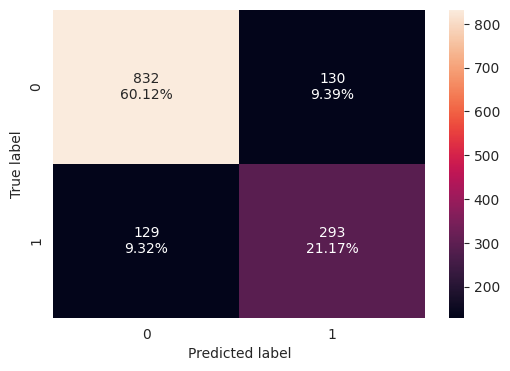

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

**Observations:**  On test data with less nodes.

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 60.12% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 9.39% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 9.32% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 21.17% of cases where actual value also was postitive.

True recall% = 21.17%

In [ ]:
decision_tree_test_perf = model_performance_classification_sklearn(estimator, X_test, y_test)
print("Training performance:")
print(decision_tree_test_perf)

Training performance:
   Accuracy  Recall  Precision      F1
0   0.82803 0.86256    0.66912 0.75362


**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.00000     0.00000
1       0.00020     0.00059
2       0.00020     0.00120
3       0.00020     0.00181
4       0.00021     0.00222
5       0.00021     0.00243
6       0.00022     0.00373
7       0.00022     0.00485
8       0.00023     0.00531
9       0.00025     0.00654
10      0.00025     0.00777
11      0.00025     0.00827
12      0.00025     0.00876
13      0.00025     0.00926
14      0.00026     0.00978
15      0.00026     0.01029
16      0.00026     0.01081
17      0.00026     0.01132
18      0.00027     0.01186
19      0.00027     0.01239
20      0.00027     0.01292
21      0.00027     0.01345
22      0.00027     0.01452
23      0.00028     0.01507
24      0.00028     0.01562
25      0.00028     0.01700
26      0.00028     0.01755
27      0.00028     0.01783
28      0.00028     0.01838
29      0.00028     0.01894
30      0.00028     0.01950
31      0.00028     0.02007
32      0.00029     0.02064
33      0.00029     0.02122
34      0.00029     0.02179
35      0.00029     0.02237
36      0.00029     0.02296
37      0.00029     0.02354
38      0.00029     0.02413
39      0.00029     0.02472
40      0.00029     0.02531
41      0.00030     0.02590
42      0.00030     0.02737
43      0.00030     0.02856
44      0.00030     0.02915
45      0.00030     0.02975
46      0.00030     0.03035
47      0.00030     0.03095
48      0.00030     0.03156
49      0.00030     0.03217
50      0.00031     0.03310
51      0.00031     0.03372
52      0.00032     0.03435
53      0.00033     0.03468
54      0.00033     0.03535
55      0.00035     0.03642
56      0.00035     0.03748
57      0.00037     0.03932
58      0.00037     0.03969
59      0.00037     0.04303
60      0.00037     0.04377
61      0.00037     0.04526
62      0.00037     0.04638
63      0.00038     0.04714
64      0.00039     0.04908
65      0.00039     0.05065
66      0.00039     0.05221
67      0.00040     0.05261
68      0.00040     0.05540
69      0.00041     0.05824
70      0.00041     0.05906
71      0.00041     0.05948
72      0.00041     0.05989
73      0.00041     0.06071
74      0.00041     0.06154
75      0.00041     0.06195
76      0.00041     0.06237
77      0.00041     0.06278
78      0.00041     0.06319
79      0.00041     0.06402
80      0.00041     0.06443
81      0.00041     0.06526
82      0.00041     0.06567
83      0.00041     0.06608
84      0.00041     0.06650
85      0.00042     0.06859
86      0.00043     0.07029
87      0.00043     0.07201
88      0.00043     0.07288
89      0.00044     0.07332
90      0.00044     0.07864
91      0.00045     0.08045
92      0.00045     0.08180
93      0.00045     0.08315
94      0.00046     0.08454
95      0.00046     0.08501
96      0.00046     0.08593
97      0.00046     0.08733
98      0.00046     0.08779
99      0.00046     0.08826
100     0.00046     0.08872
101     0.00047     0.08965
102     0.00047     0.09012
103     0.00047     0.09106
104     0.00047     0.09248
105     0.00048     0.09486
106     0.00048     0.09582
107     0.00048     0.09726
108     0.00048     0.09823
109     0.00049     0.09921
110     0.00050     0.09970
111     0.00050     0.10020
112     0.00050     0.10069
113     0.00051     0.10172
114     0.00052     0.10223
115     0.00052     0.10275
116     0.00052     0.10642
117     0.00053     0.10695
118     0.00053     0.10801
119     0.00054     0.10855
120     0.00054     0.11070
121     0.00054     0.11125
122     0.00054     0.11179
123     0.00054     0.11830
124     0.00055     0.11886
125     0.00055     0.11941
126     0.00056     0.12052
127     0.00056     0.12331
128     0.00056     0.12386
129     0.00056     0.12498
130     0.00056     0.12554
131     0.00056     0.12666
132     0.00056     0.12722
133     0.00057     0.12778
134     0.00057     0.12892
135     0.00058     0.12949
136     0.00058     0.13065
137     0.00058     0.13182
138     0.00058     0.13240
139     0.00060     0.13300
140     0.00060     0.13360
141     0.00061     0.13421
1

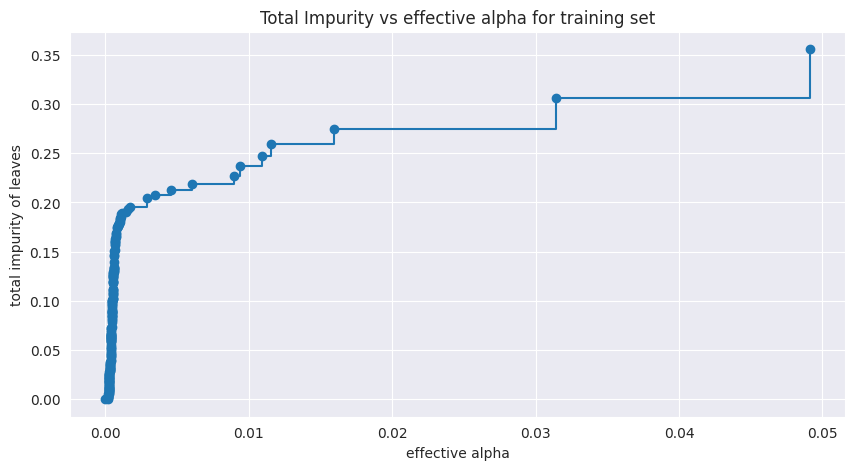

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06098340060608587


In this we could see we have successfully trained a decision tree, and the last tree in the list has only one node with a ccp_alpha of 0.06098340060608587. This is an indication that the tree has been pruned

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

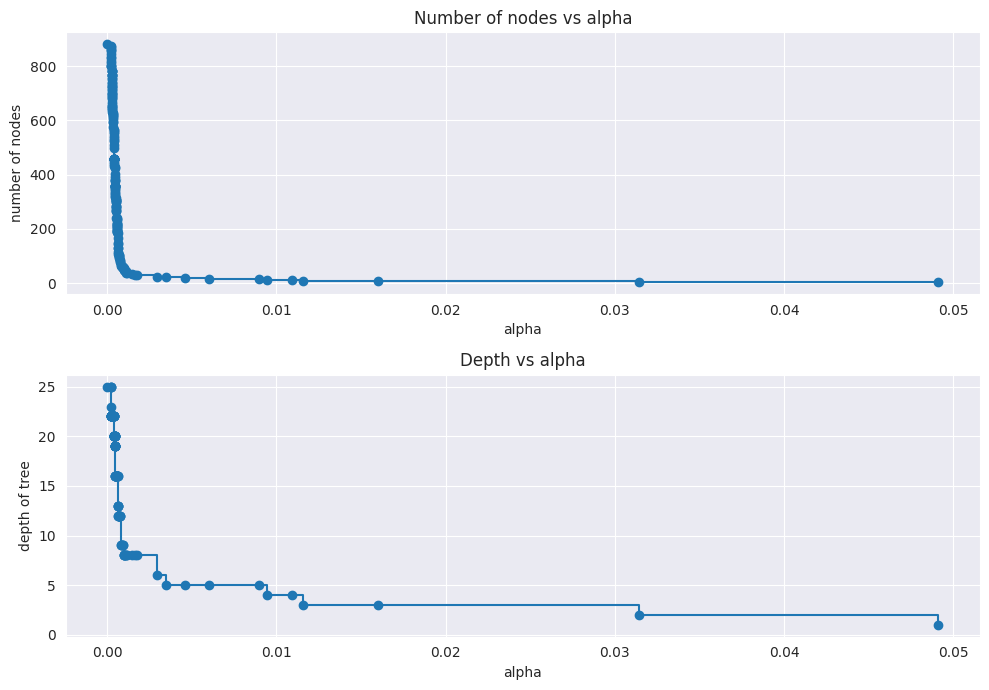

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

These two plots gives us insight of the decision tree how it is changed as we adjust the pruning parameter ccp_alpha. The first plot shows how the number of nodes decreases as ccp_alpha increases, indicating the pruning effect, while the second plot shows how the depth of the tree changes with varying ccp_alpha values. This helps in finding an appropriate balance between complexity and performance in decision tree model.

### Recall Score vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

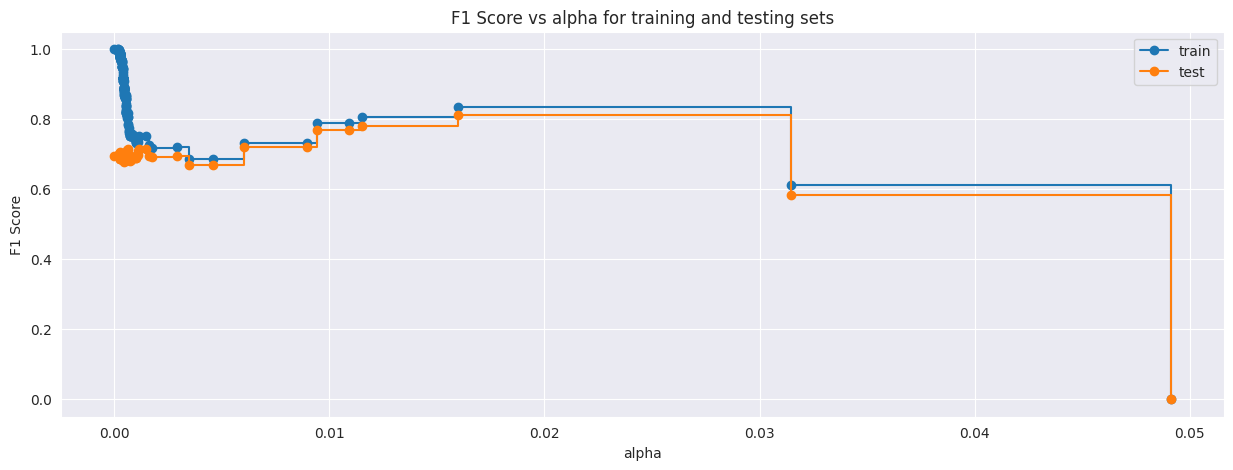

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01597263241824501, random_state=1)


The decision tree classifier with the parameters ccp_alpha=0.01597263241824501 and random_state=1 is a pruned tree that has undergone cost complexity pruning. Here's what you can infer about this tree: Tree has gone through the pruning and it has elliminated unecessary branches and nodes.



**Checking model performance on training set**

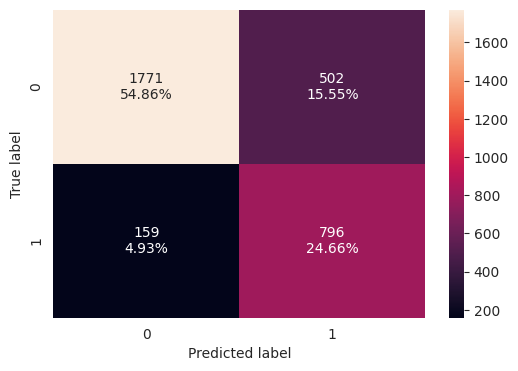

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

**Observations:** Post pruned

True Negative (predicted = 0 and true = 0 ): The model predicted True negative outcome 54.86% of cases where actual value was also negative.

False Positive (FP): The model predicted False positive outcome 15.55% of cases where actual value was 0.

False Negative (FN): The model predicted false negative outcome 4.93% of cases where actual value was 1.

True Positive (TP): The model predicted positive outcome 24.66% of cases where actual value also was postitive.

True recall% = 24.66%

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.79523 0.83351    0.61325 0.70661

Observation:
The train performance metrics for the model is as follows:

Accuracy: 0.79

Recall: 0.83

Precision: 0.61

F1 Score: 0.70



**Checking model performance on test set**

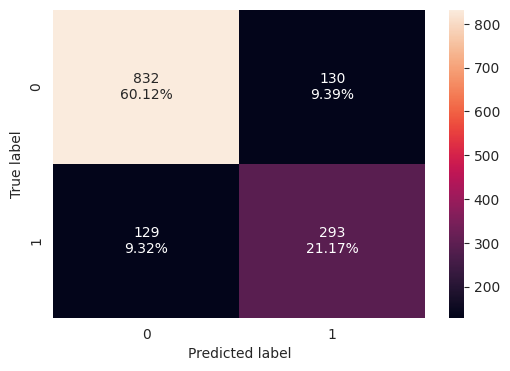

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.78829 0.81280    0.61580 0.70072

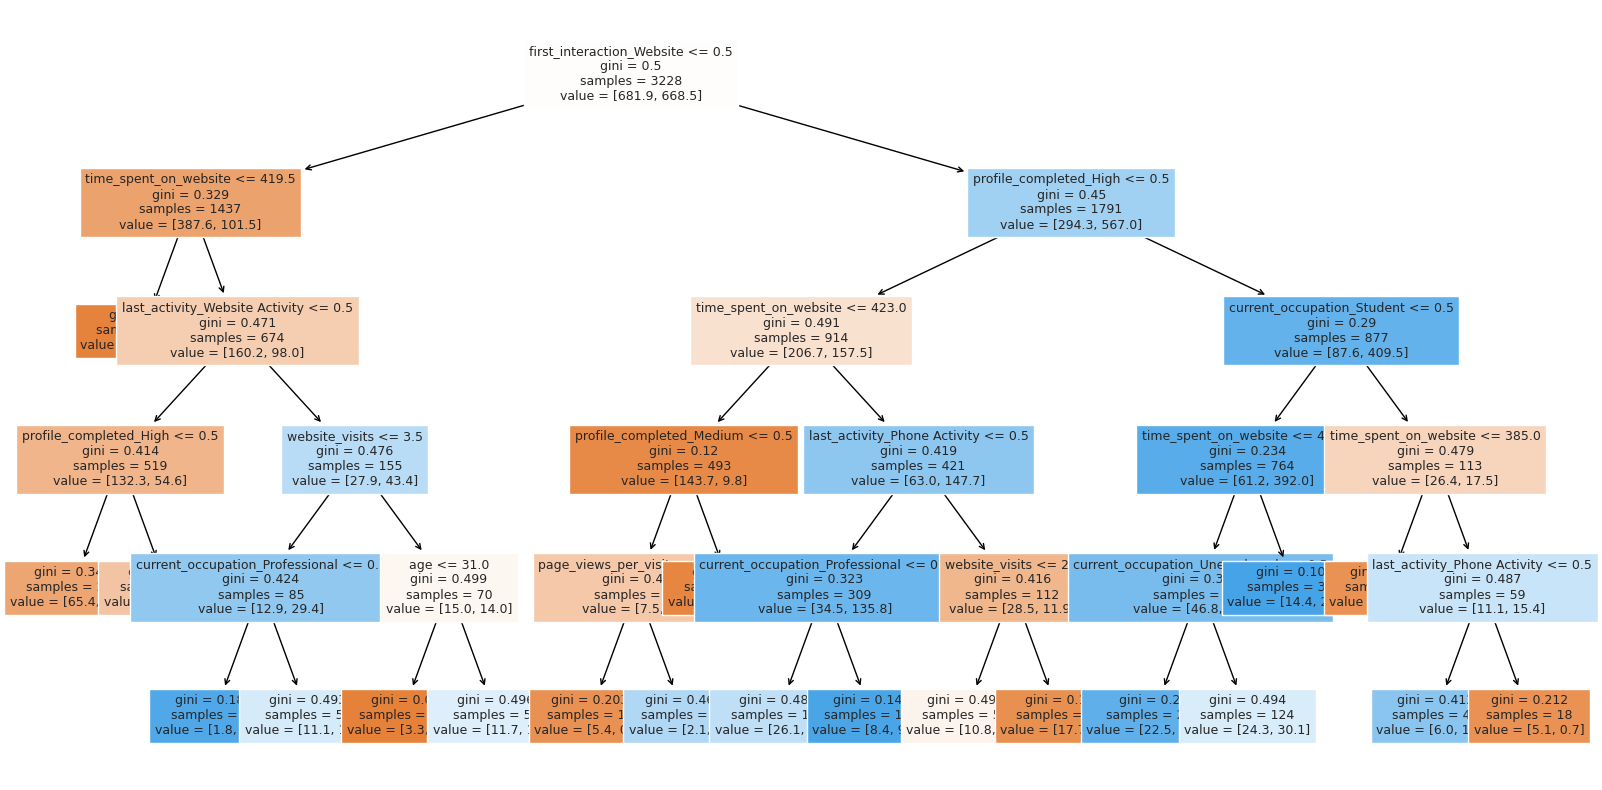

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In this decision tree we could see the representation of the decision tree with arrows indicating the splits and branches.and in this we could see the structure along with the arrows that indicate the splits.

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- weights: [227.40, 3.50] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- profile_completed_High <= 0.50
|   |   |   |   |--- weights: [65.40, 18.90] class: 0
|   |   |   |--- profile_completed_High >  0.50
|   |   |   |   |--- weights: [66.90, 35.70] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- website_visits <= 3.50
|   |   |   |   |--- current_occupation_Professional <= 0.50
|   |   |   |   |   |--- weights: [1.80, 15.40] class: 1
|   |   |   |   |--- current_occupation_Professional >  0.50
|   |   |   |   |   |--- weights: [11.10, 14.00] class: 1
|   |   |   |--- website_visits >  3.50
|   |   |   |   |--- age <= 31.00
|   |   |   |   |   |--- weights: [3.30, 0.00] class: 0
|   |   |   |   |--- age >  31.00
|   |   |   |   |   |--- weights: [11.70, 14.00] class: 1
|--- first_interaction_Web

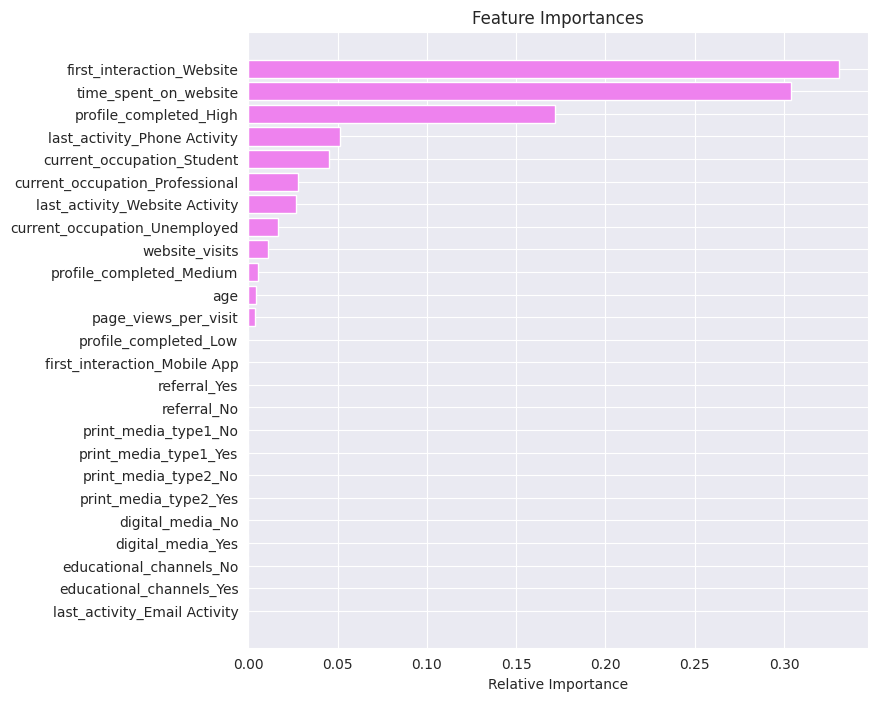

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

first_interaction_Website and time_spent_on_website is higher bars in the plot are more important, while those with lower bars are less important.

### Comparing Decision Tree models

Here

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 1.00000                      0.83240   
Recall                   1.00000                      0.88168   
Precision                1.00000                      0.66299   
F1                       1.00000                      0.75685   

           Decision Tree (Post-Pruning)  
Accuracy                        0.79523  
Recall                          0.83351  
Precision                       0.61325  
F1                              0.70661

 **Observations:**

 The decision tree model with pre-pruning seems to strike a good balance between accuracy, recall, precision, and F1 score, indicating better generalization compared to the model without pruning (which is overfitting) and the post-pruned model (which might have sacrificed some performance for simplicity).

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.81286                      0.82803   
Recall                   0.69431                      0.86256   
Precision                0.69267                      0.66912   
F1                       0.69349                      0.75362   

           Decision Tree (Post-Pruning)  
Accuracy                        0.78829  
Recall                          0.81280  
Precision                       0.61580  
F1                              0.70072

**Observations**
Similar to the training performance, the decision tree model with pre-pruning performs well on the test set by achieving a balance between accuracy, recall, precision, and F1 score. It appears to generalize better than the other models on the test data.

## Actionable Insights and Recommendations

Based on the analysis of the best Decision Tree and Logistic Regression models, here are some actionable insights and recommendations:

Best Decision Tree Model (Pre-Pruning):

The Decision Tree model with pre-pruning has shown a good balance between accuracy, recall, precision, and F1 score on both the training and test sets.

The relatively high recall indicates that the model is effective at identifying positive cases, which is crucial for lead conversion prediction.

It correctly identified a significant proportion of converted applications.
The precision is reasonable, suggesting that while identifying positives, it doesn't produce too many false positives.


Recommendations based on the Decision Tree Model:

Further investigate the important features identified by the Decision Tree. These features could provide insights into what factors contribute most to lead conversion. For example, look into how time spent on the website, first interaction source, and profile completion impact conversion.
This might improve the chances of conversion.



Best Logistic Regression Model (Threshold 0.42):

The model is capable of identifying both positive and negative cases effectively.

Recommendations based on the Logistic Regression Model:

Explore the specific factors that contributed to the improved performance at the threshold of 0.42 compared to the default threshold.

Identify which features are driving the higher recall and precision.


Consider implementing the model with the threshold of 0.42 for lead conversion
prediction.

Monitor the model's performance over time and continuously validate its predictions against actual outcomes. This can help in identifying any shifts or changes in the conversion dynamics.


General Recommendations:

Implementing an ensemble model that combines the strengths of both Decision Trees and Logistic Regression could potentially lead to further improvements in predictive performance.

Regularly update and refine the model as new data becomes available.

Lead conversion dynamics might change over time, so keeping the model up to date is crucial for maintaining accuracy and relevancy.


Remember that the effectiveness of these recommendations will also depend on the specific characteristics of your business and industry, as well as the available resources for implementing these strategies.